<a href="https://colab.research.google.com/github/dddddyoung2/kagglestudy/blob/main/%5B9%EC%A3%BC%EC%B0%A8_2_1%5D_kaggle_survey_%EB%B0%95%EC%A7%80%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#캐글 필사 스터디
## 9.Other Dataset - Anomaly Detection, visualization
### 2nd level. Kaggle survey
#### [1st kernel]
- https://www.kaggle.com/ash316/novice-to-grandmaster/notebook
- 2021년 kaggle survey 대회에 참가하기 위해 9주차 필사 우선 진행
- 필사날짜
  - 2021.10.19-20


kaggle은 이용자가 100만 명이 넘는 세계 최대 데이터 사이언스 플랫폼으로, 나 같은 학생들이 데이터 사이언스, 머신러닝 분야에서 배우고 성장하기 좋은 플랫폼이다. 통계학자, 데이터 과학자, 머신러닝 실무자 등 다양한 영역의 사용자가 있다.Kaggle이 출판한 이 데이터 세트는 데이터를 분석하고 조사하는 것을 좋아하는 저 같은 사람들에게 소중한 것입니다. 이 노트에서는 데이터 과학자가 가장 많이 사용하는 도구와 같이 데이터 과학을 배우기 위한 리소스 등을 알고 싶어 하는 몇 가지 동향 또는 일반적인 질문을 찾아볼 것입니다.

우리가 직면할 수 있는 가장 큰 문제는 가짜와 가짜 대응이다. 설문 조사이기 때문에 모든 사람이 제대로 된 자격증으로 답하지는 않을 것이고, 따라서 특이점도 많을 것으로 짐작된다. 데이터 풀로 바로 이동하여 몇 가지 통찰력을 얻도록 하겠습니다.

## Introduction

데이터 과학자는 누구입니까?
데이터 사이언티스트(data scientist)는 데이터를 정리, 관리 및 정리하고, 기술 통계 및 분석을 수행하여 통찰력을 개발하고, 예측 모델을 구축하고, 비즈니스 관련 문제를 해결하는 통계학자 또는 프로그래머입니다. Kaggle에 대한 데이터 과학자의 의견을 들어보겠습니다.

In [1]:
pip install squarify

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
#from scipy.misc import imread # 이미지 불러오는 라이브러리
import codecs
from IPython.display import HTML
from matplotlib_venn import venn2
# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# 구글 드라이ㅡ 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#cd '/content/drive/MyDrive/Study/kaggle_study/8_1.Survey'

In [5]:
# 압축 풀기
#!unzip -qq '/content/drive/MyDrive/Study/kaggle_study/8_1.Survey/kaggle_survey_2017.zip'

In [6]:
response = pd.read_csv('/content/drive/MyDrive/Study/kaggle_study/8_1.Survey/multipleChoiceResponses.csv', encoding = 'ISO-8859-1') # 인코딩

In [7]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

## Some Basic Analysis

In [8]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique()) # nunique
print('Country with highest respondents:', response['Country'].value_counts().index[0],
      'with', response['Country'].value_counts().values[0], 'respondents')
print('Youngest respondent:', response['Age'].min(), ' and Oldest respondent:', response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


Seriously?? Youngest Rspondent is not even a year old. LOL!! And how come grandpa is still coding at the age of 100. It may be a fake response.

## Gender Split

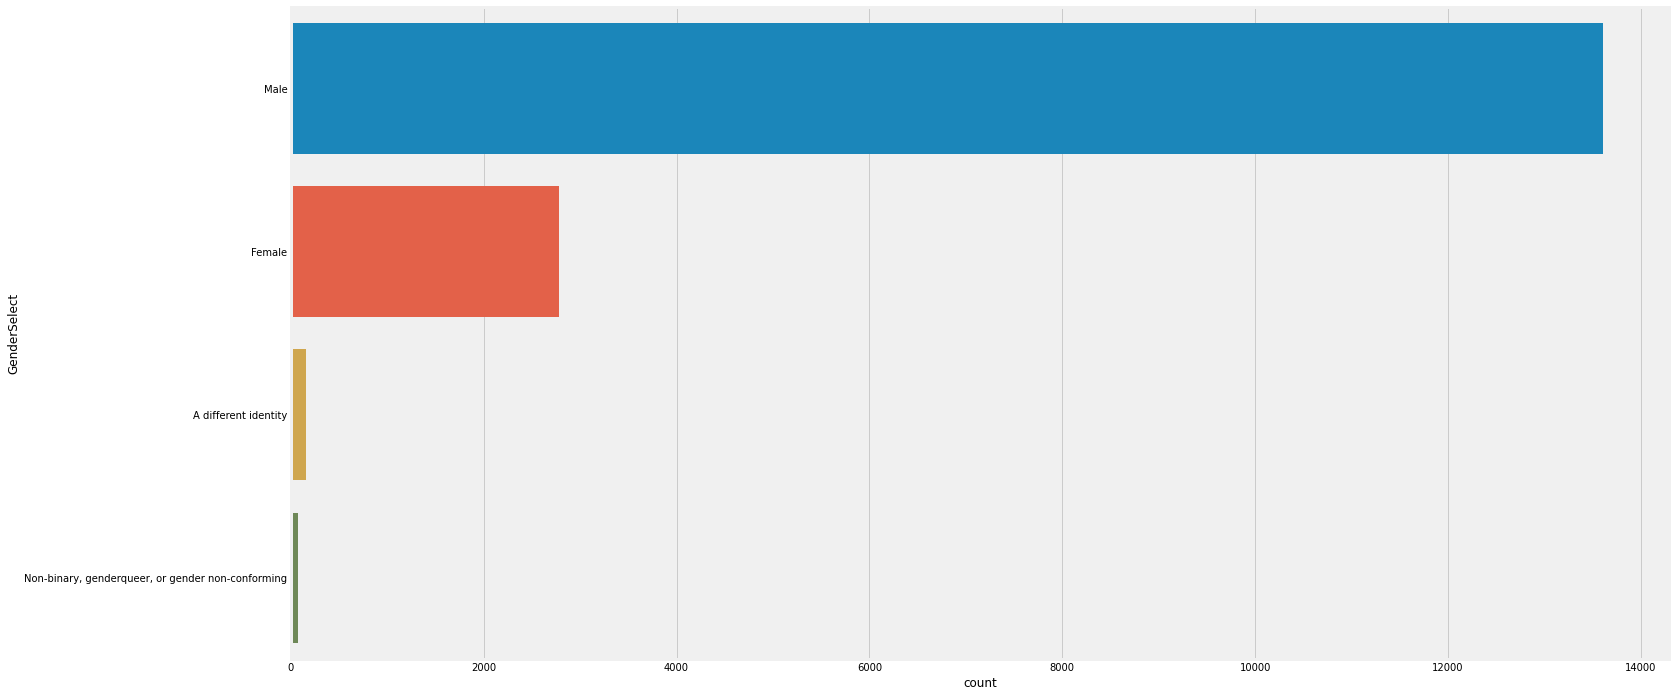

In [9]:
plt.subplots(figsize = (22, 12))
sns.countplot(y = response['GenderSelect'], 
              order = response['GenderSelect'].value_counts().index)
plt.show()

## Respondents By Country(국가별 응답자)

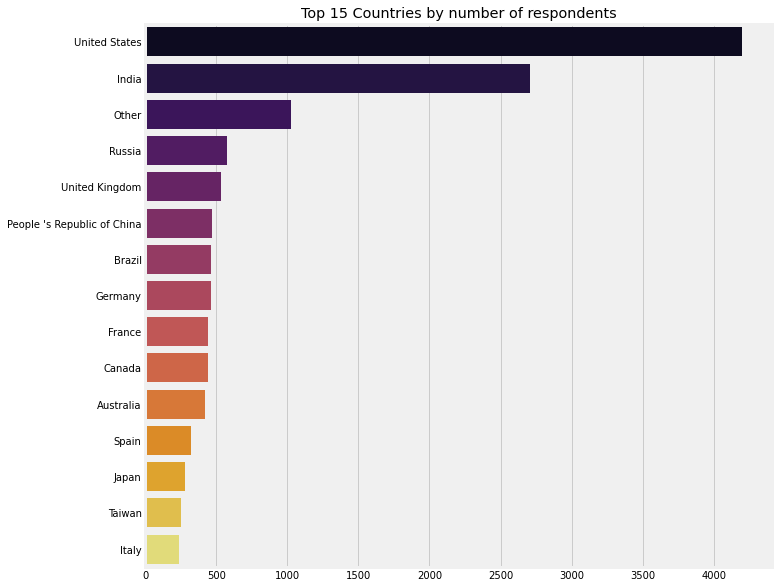

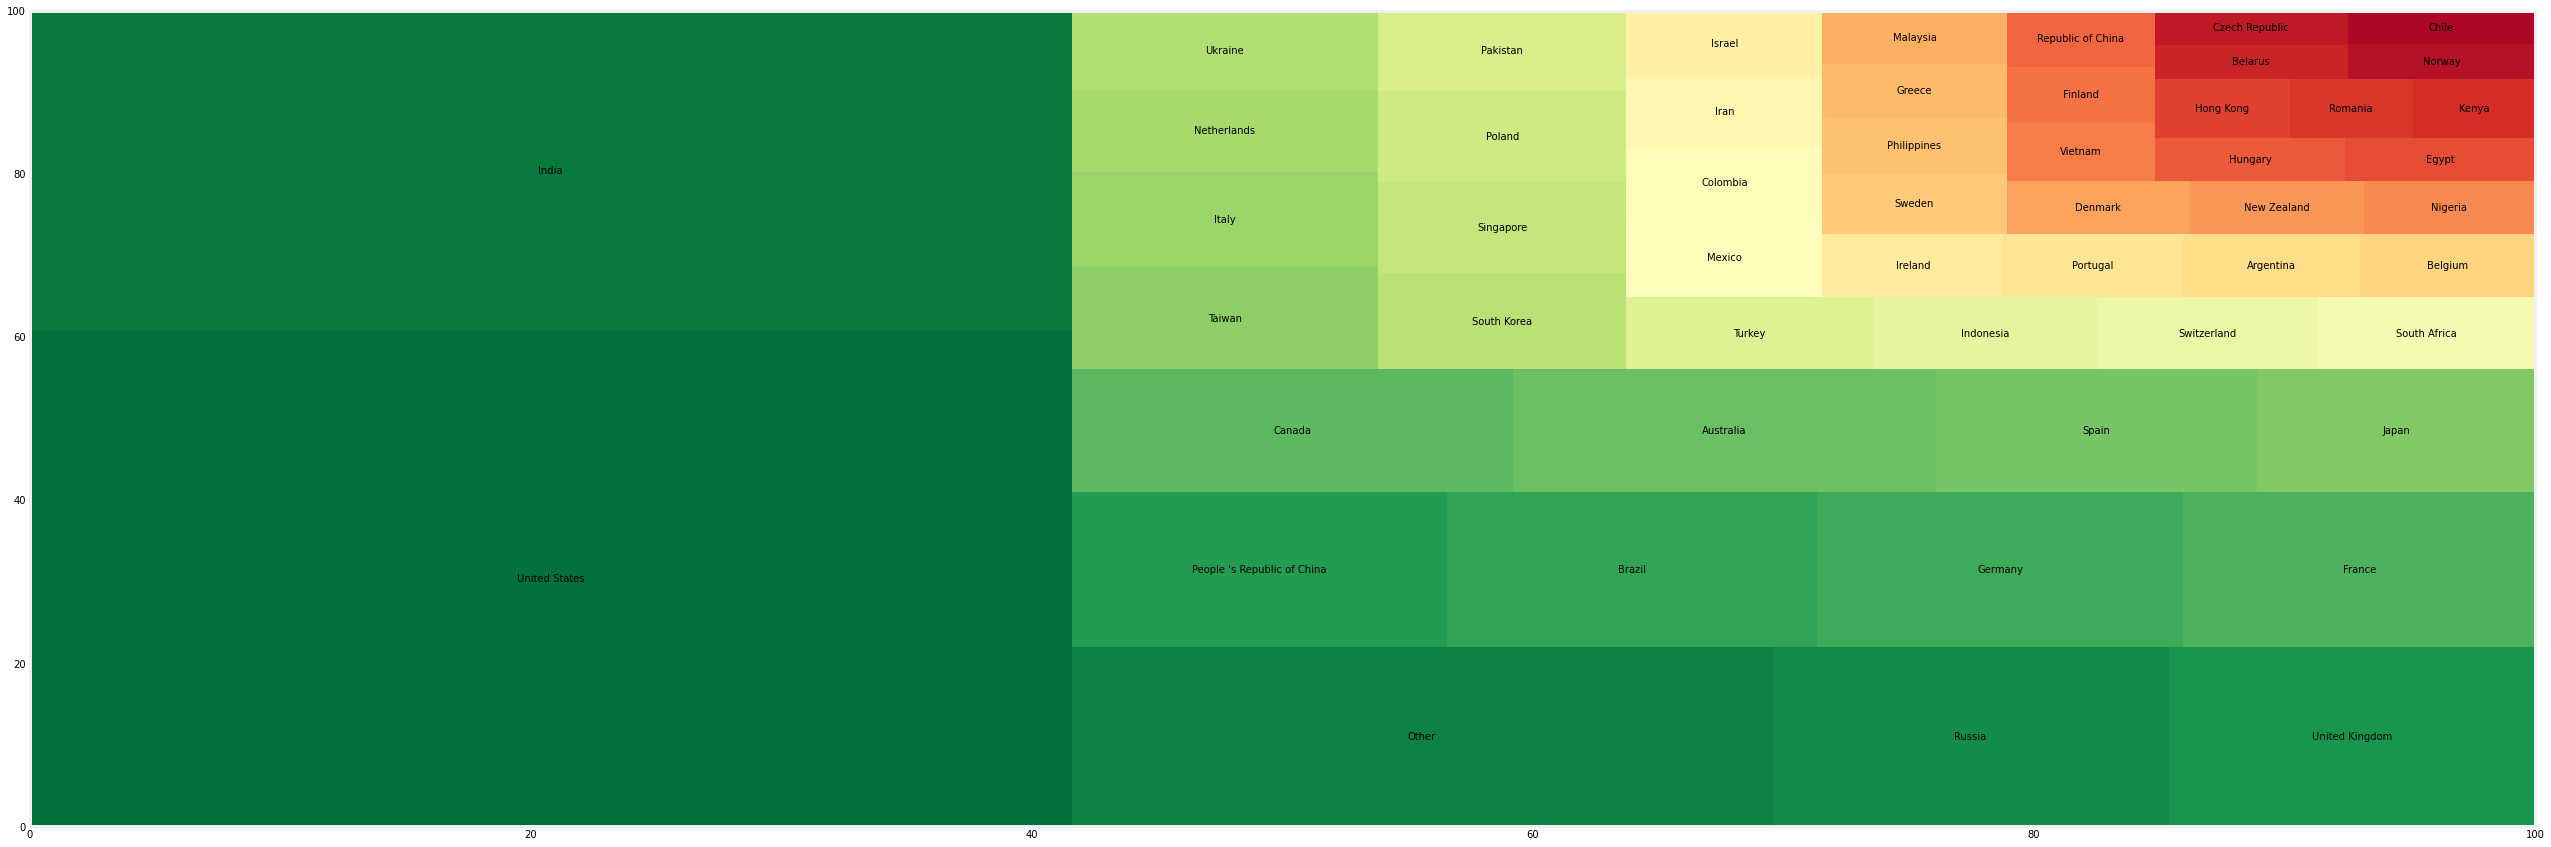

In [10]:
resp_coun = response['Country'].value_counts()[:15].to_frame() # 프레임으로 만들어서 바로도 가능
sns.barplot(resp_coun['Country'], resp_coun.index, palette = 'inferno')
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig = plt.gcf() #?
fig.set_size_inches(10, 10)
plt.show()

# 트리로 국가별 전체 비율 봄
tree = response['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values,
              label = tree.index,
              color = sns.color_palette('RdYlGn_r', 52))
plt.rcParams.update({'font.size' :20})
fig = plt.gcf()
fig.set_size_inches(40, 15)
plt.show()

미국과 인도는 전체 응답자의 약 1/3을 차지한다. 마찬가지로 칠레는 응답자 수가 가장 적다. 이 그래프는 카글 이용자 대다수가 인도와 미국 출신이라고 할 만큼 충분한가? 카글 전체 이용자는 100만 명이 넘고 응답자는 16k에 불과하기 때문에 그렇게 생각하지 않는다.

## Compensation
데이터 사이언티스트들은 가장 높은 보수를 받는 개인들 중 하나이다. 평가관의 의견을 확인해 보겠습니다.

In [11]:
response['CompensationAmount'].head(10)

0        NaN
1        NaN
2        NaN
3    250,000
4        NaN
5        NaN
6        NaN
7        NaN
8      80000
9    1200000
Name: CompensationAmount, dtype: object

In [12]:
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')

rates=pd.read_csv('/content/drive/MyDrive/Study/kaggle_study/8_1.Survey/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']

print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


급여의 중위수를 보면 데이터 과학자가 좋은 급여 혜택을 누리고 있음을 알 수 있습니다.

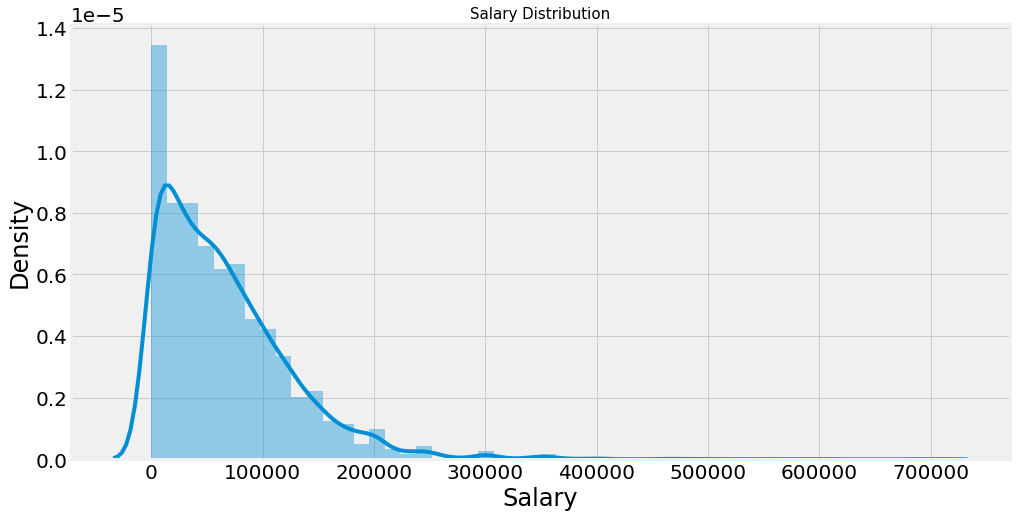

In [13]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution',size=15)
plt.show()

### Compensation by Country

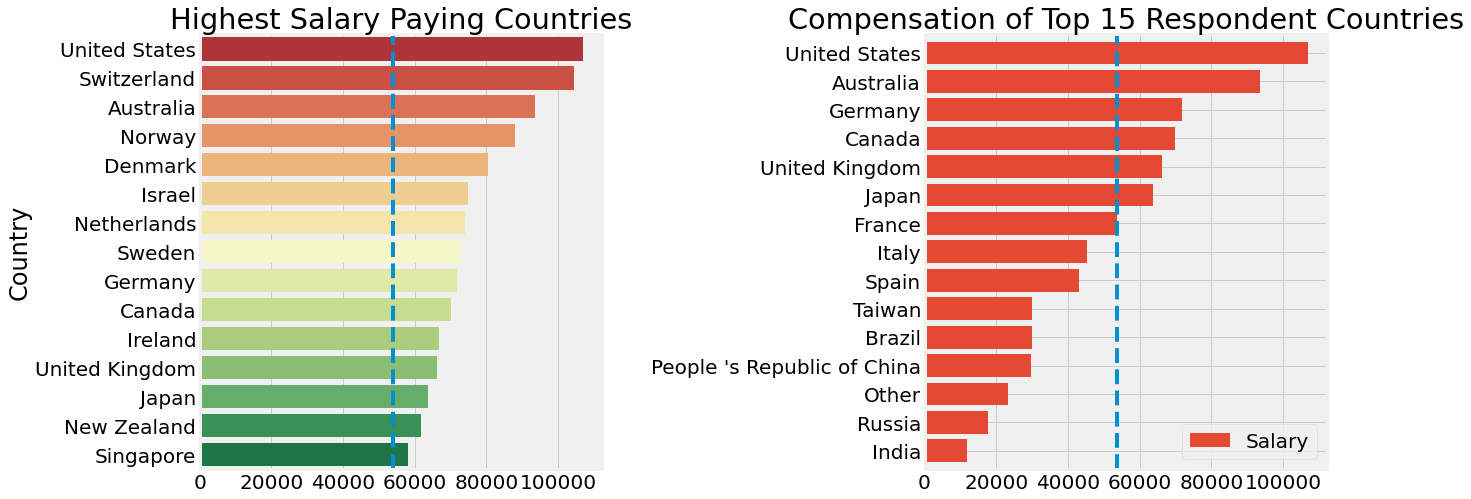

In [14]:
# 코드저장
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending = False)[:15].to_frame()
sns.barplot('Salary', sal_coun.index, data = sal_coun, palette = 'RdYlGn', ax = ax[0])
ax[0].axvline(salary['Salary'].median(), linestyle = 'dashed') #수직 수평선, axhline(): 가로 수평선
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')

max_coun = salary.groupby('Country')['Salary'].median().to_frame()
max_coun = max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by = 'Salary', ascending = True).plot.barh(width = 0.8, 
                                                                ax = ax[1], 
                                                                color = sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(), linestyle = 'dashed') #수직 수평선, axhline(): 가로 수평선
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0.8)
plt.show()

왼쪽 그래프는 급여가 높은 상위 15개 국가를 보여줍니다. 이들 국가가 전체 데이터 집합의 중간 급여보다 많은 급여를 제공하는 것은 좋은 일이다. 마찬가지로 오른쪽 그래프는 상위 15개국의 응답자별 급여를 보여 줍니다. 가장 충격적인 그래프는 인도입니다. 인도는 두 번째로 높은 응답자를 가지고 있지만, 여전히 그래프에서 가장 낮은 중위 연봉을 가지고 있습니다. 미국의 개인들은 인도의 개인들보다 거의 10배나 많은 봉급을 받는다. 이유가 뭘까요? 인도의 IT 전문가들은 정말 저임금인가요? 그건 나중에 확인하겠습니다.

> 미국 달러 기준이니까 그런거 아닌가?

### Salary By Gender

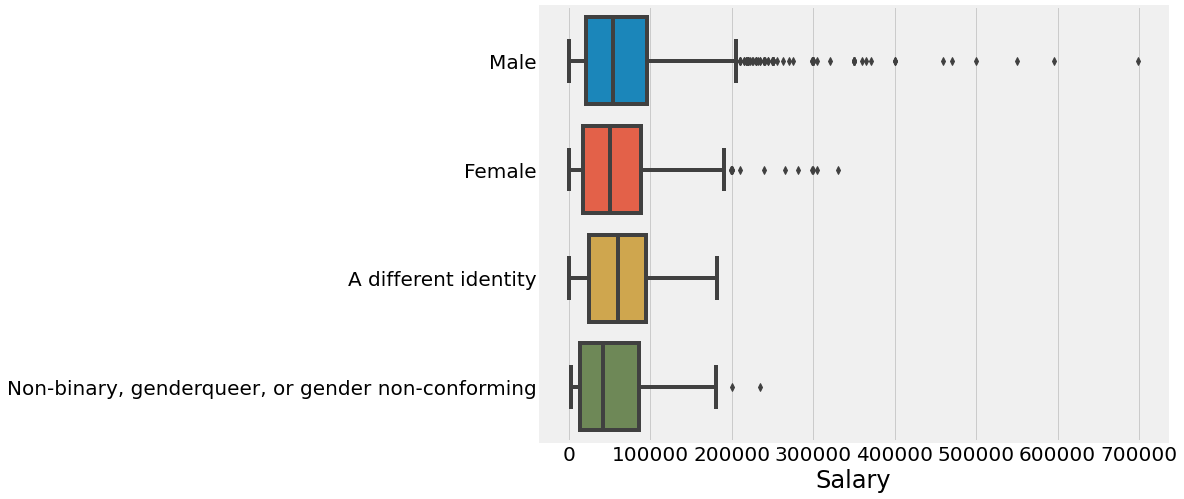

In [15]:
plt.subplots(figsize = (10,8))
sns.boxplot(y = 'GenderSelect', x = 'Salary', data = salary)
plt.ylabel('')
plt.show()

The salary for males look to be high as compared to others.

## Age

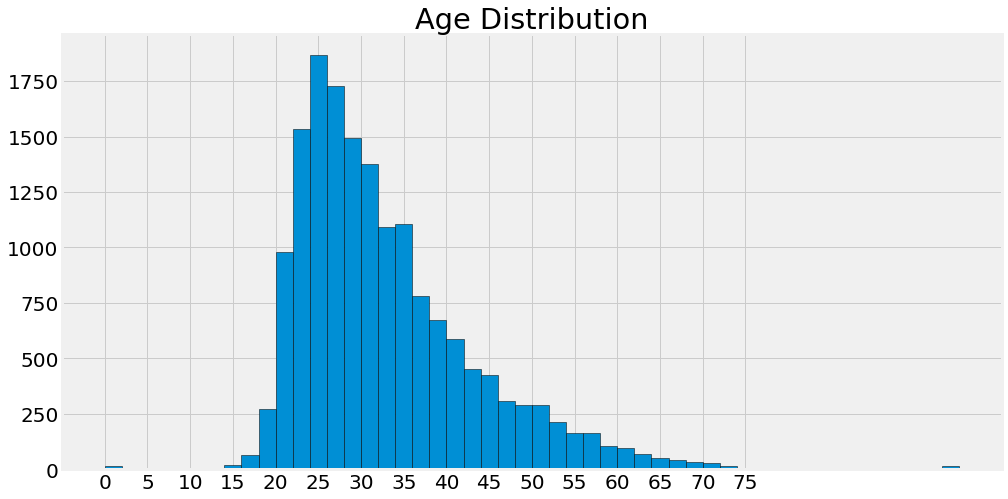

In [16]:
plt.subplots(figsize = (15, 8))
response['Age'].hist(bins=50, edgecolor = 'black') # bins?
plt.xticks(list(range(0,80,5)))
plt.title('Age Distribution')
plt.show()

The respondents are young people with majority of them being in the age bracket if 25-35.

## Profession & Major

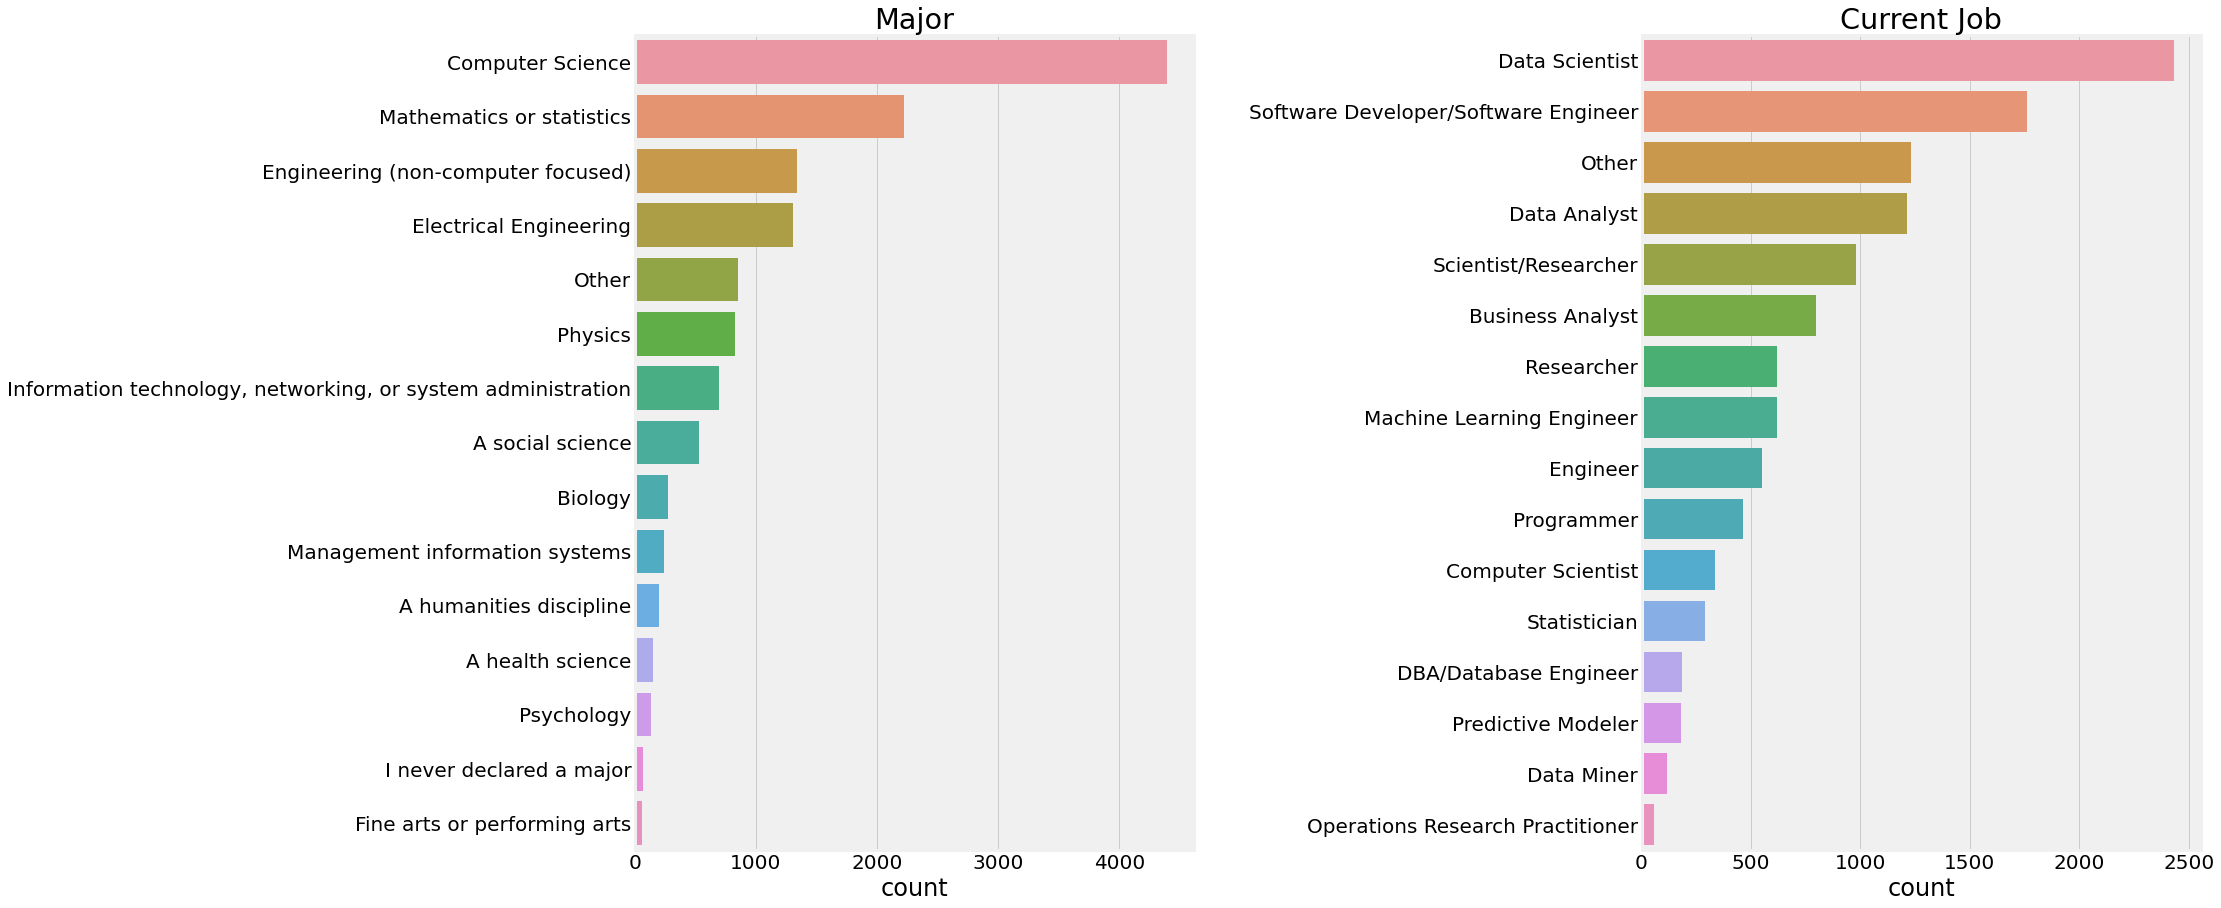

In [17]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.countplot(y=response['MajorSelect'],ax=ax[0],order=response['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')

sns.countplot(y=response['CurrentJobTitleSelect'],ax=ax[1],order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

## Compensation By Job Title

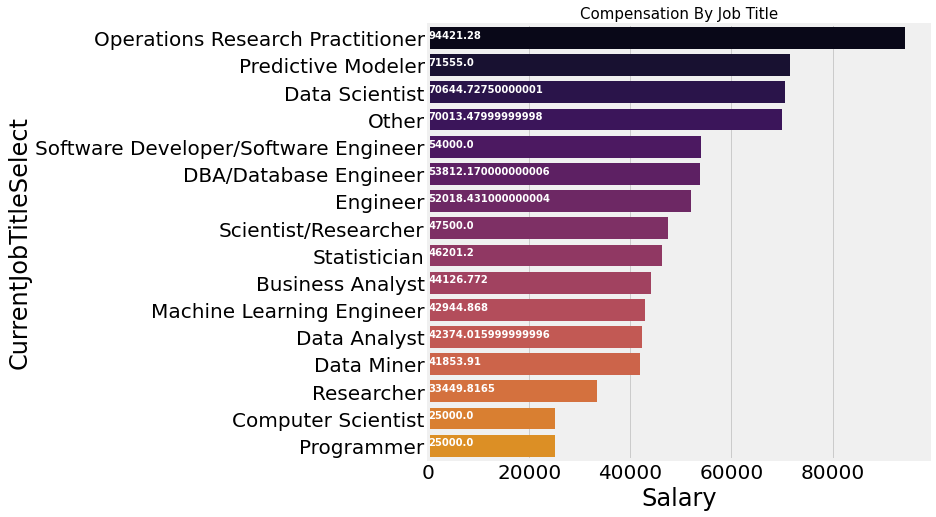

In [18]:
sal_job=salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary',ascending=False)
ax=sns.barplot(sal_job.Salary,sal_job.index,palette=sns.color_palette('inferno',20))
plt.title('Compensation By Job Title',size=15)
for i, v in enumerate(sal_job.Salary): 
    ax.text(.5, i, v,fontsize=10,color='white',weight='bold')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

## Machine Learning

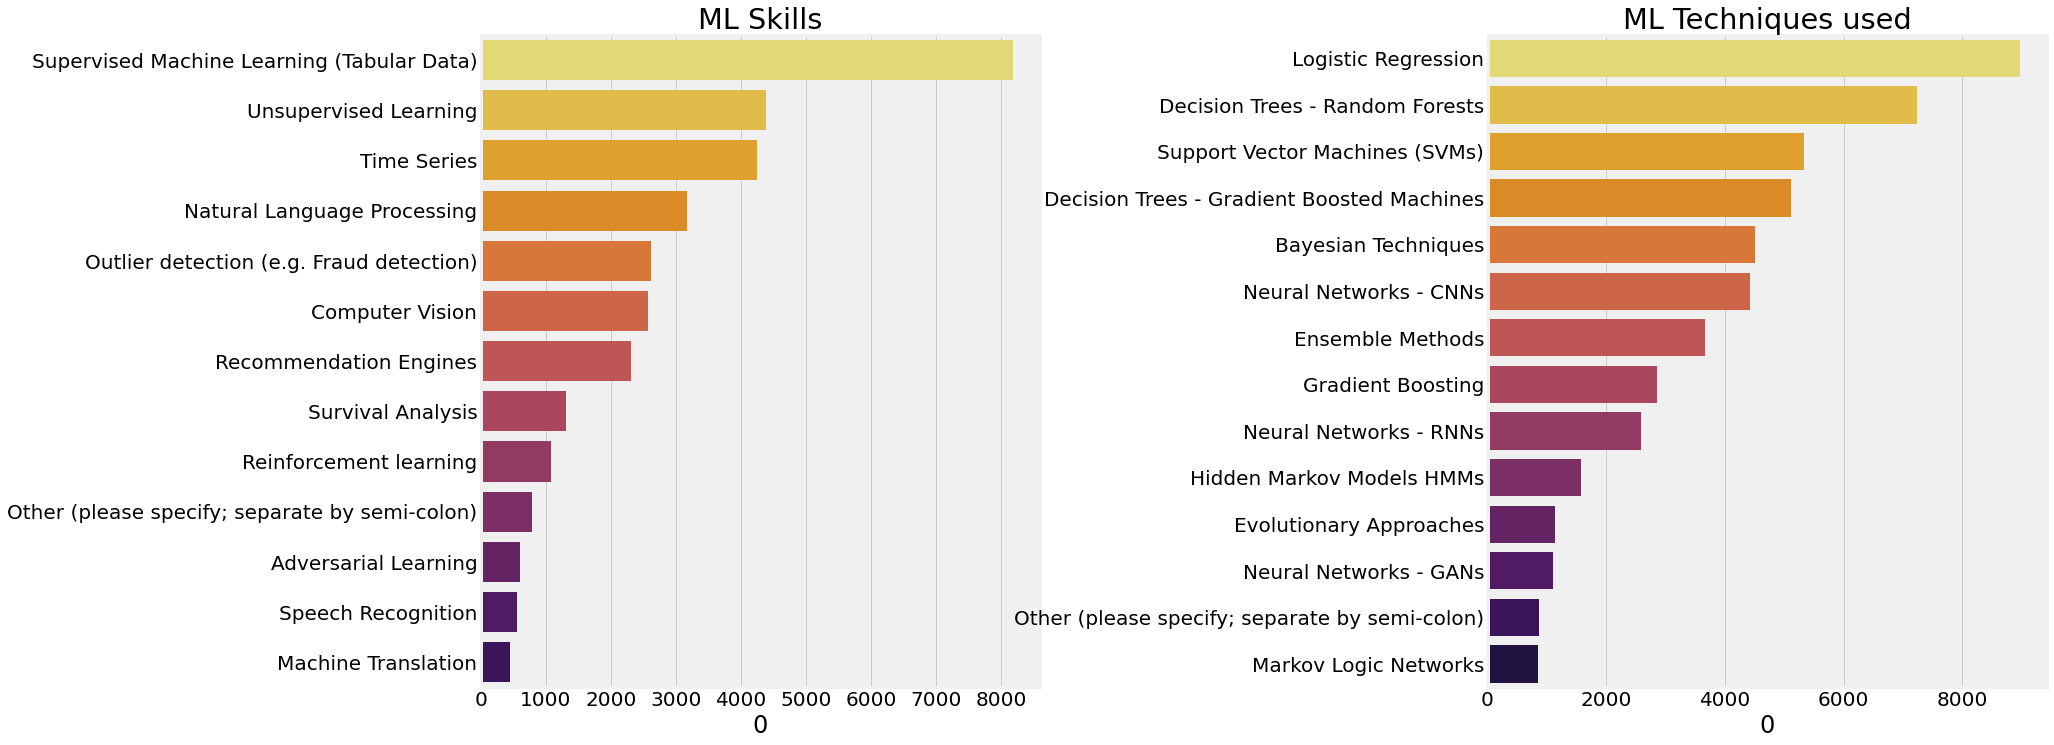

In [19]:
f,ax=plt.subplots(1,2,figsize=(25,12))
skills=response['MLSkillsSelect'].str.split(',')
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt1=pd.Series(skills_set).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('inferno_r',15))
ax[0].set_title('ML Skills')
tech=response['MLTechniquesSelect'].str.split(',')
techniques=[]
for i in tech.dropna():
    techniques.extend(i)
plt1=pd.Series(techniques).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
ax[1].set_title('ML Techniques used')
plt.subplots_adjust(wspace=0.8)
plt.show()

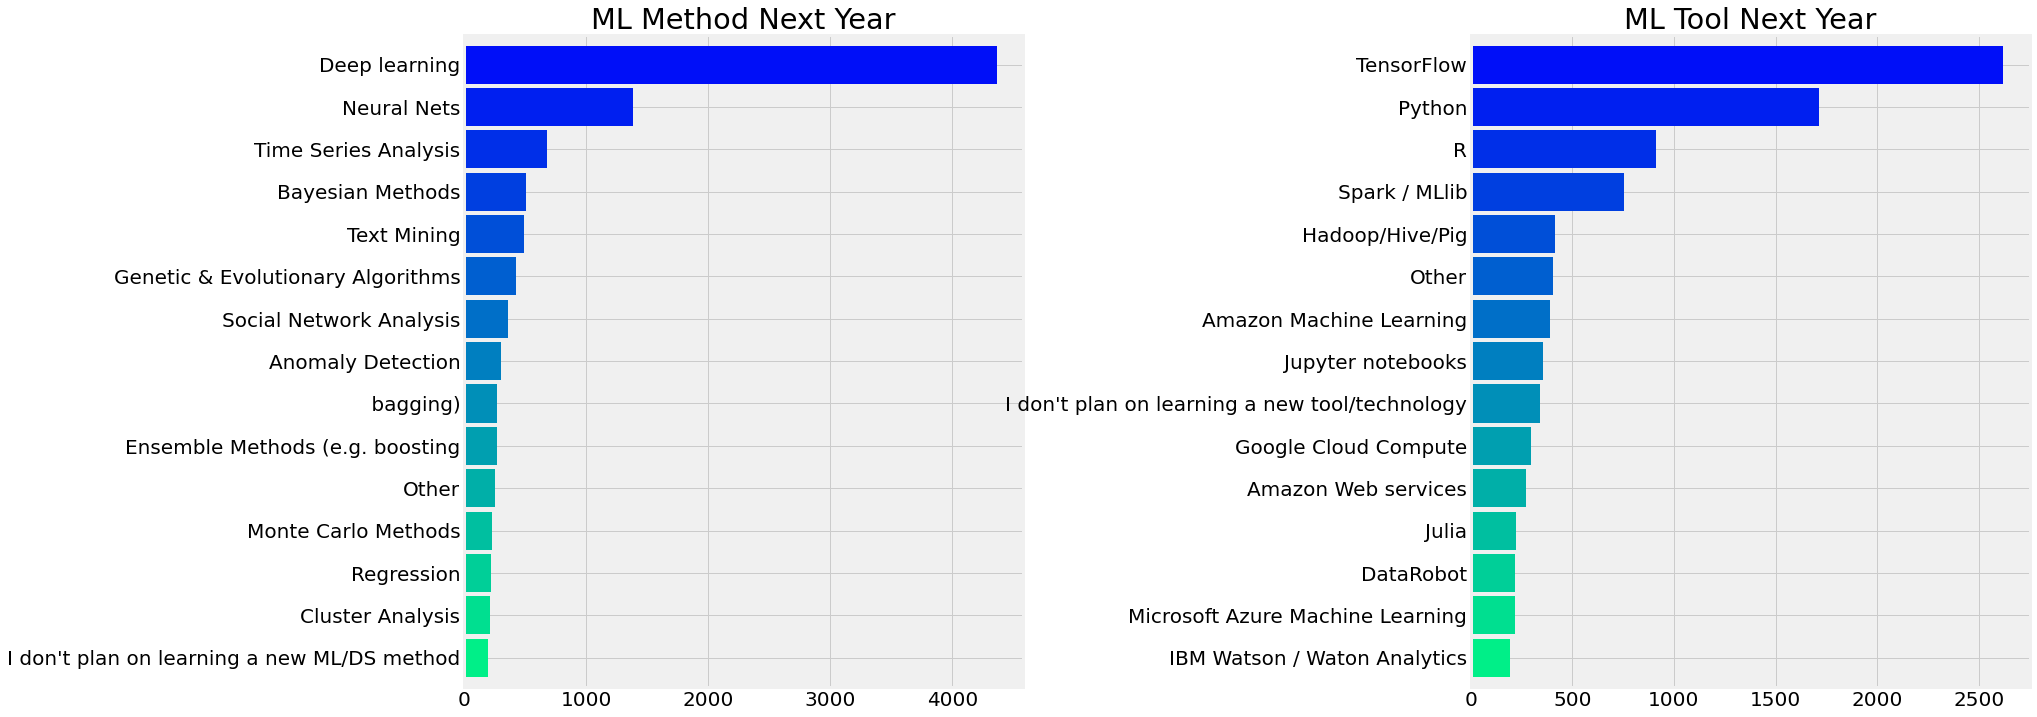

In [20]:
f,ax=plt.subplots(1,2,figsize=(25,12))
ml_nxt=response['MLMethodNextYearSelect'].str.split(',')
nxt_year=[]
for i in ml_nxt.dropna():
    nxt_year.extend(i)
pd.Series(nxt_year).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[0])
tool=response['MLToolNextYearSelect'].str.split(',')
tool_nxt=[]
for i in tool.dropna():
    tool_nxt.extend(i)
pd.Series(tool_nxt).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('ML Method Next Year')
ax[1].set_title('ML Tool Next Year')
plt.show()

내년에는 딥러닝 실무자의 수가 급증할 것이 분명하다. 딥러닝과 신경망, 또는 짧게는 인공지능이 다음 해에 가장 인기 있는 주제이다. 도구 측면에서도 R보다 파이썬이 더 선호된다. Spark 및 Hadoop과 같은 빅 데이터 툴도 향후 몇 년 동안 상당한 점유율을 차지하고 있습니다.

## Best Platforms to Learn

In [21]:
response['LearningPlatformSelect'].head(5)

0    College/University,Conferences,Podcasts,Trade ...
1                                               Kaggle
2    Arxiv,College/University,Kaggle,Online courses...
3    Blogs,College/University,Conferences,Friends n...
4                    Arxiv,Conferences,Kaggle,Textbook
Name: LearningPlatformSelect, dtype: object

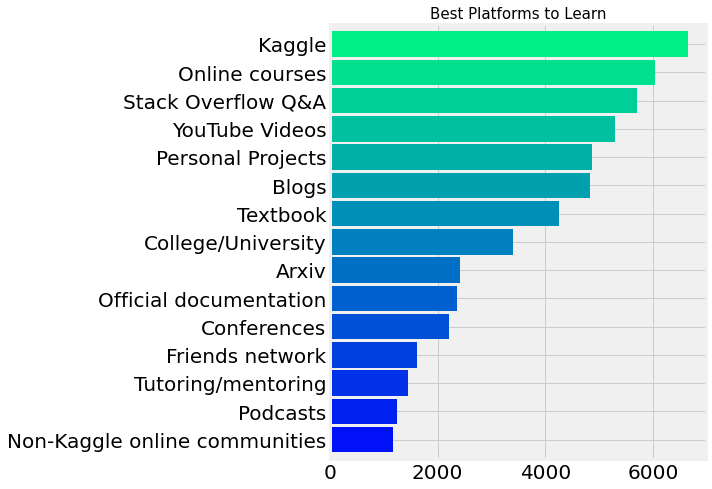

In [22]:
plt.subplots(figsize = (6,8))
learn=response['LearningPlatformSelect'].str.split(',')
platform = []
for i in learn.dropna():
  platform.extend(i)
pd.Series(platform).value_counts()[:15].sort_values(ascending = True).plot.barh(width = 0.9,
                                                                                color = sns.color_palette('winter', 15))
plt.title('Best Platforms to Learn',size=15)
plt.show()

제가 개인적으로 가장 좋아하는 Kaggle은 데이터 사이언스 학습에 가장 많이 필요한 자료입니다. 실제로 경험이 많은 데이터 사이언티스트들의 공책을 가지고 있기 때문입니다. 다음 선택은 온라인 코스, 즉 MOOC의 선택입니다. coursera, udacity와 같은 플랫폼은 학습을 위한 대화형 비디오와 연습을 제공합니다. 시라즈 라발과 같은 직유튜브 채널들은 무료 학습 매체를 제공한다. 이 모든 매체는 교과서보다 위에 있습니다. 그 이유는 교과서의 내용이 한정되어 있거나 사람들이 동영상 시청과 학습을 더 좋아하기 때문일 것이다.

## Hardware Used

In [23]:
response['HardwarePersonalProjectsSelect'].head(10)

0                                                  NaN
1                                                  NaN
2                               Basic laptop (Macbook)
3                                                  NaN
4                                                  NaN
5                                                  NaN
6                                                  NaN
7    Basic laptop (Macbook),Gaming Laptop (Laptop +...
8                                                  NaN
9                                                  NaN
Name: HardwarePersonalProjectsSelect, dtype: object

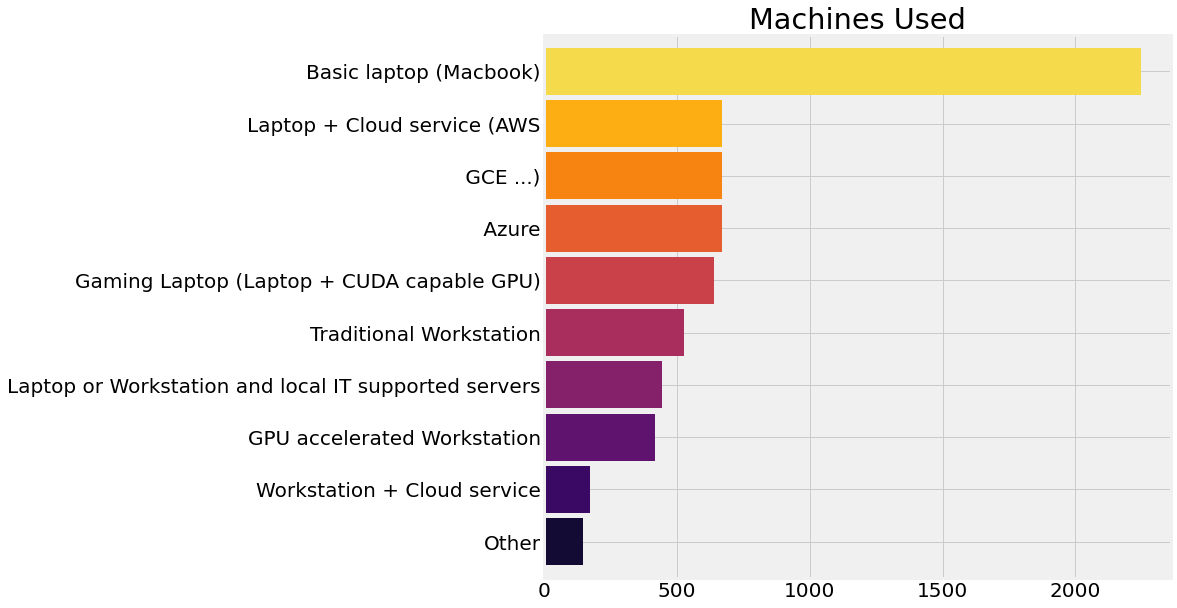

In [24]:
plt.subplots(figsize=(10,10))
hard=response['HardwarePersonalProjectsSelect'].str.split(',')
hardware=[]
for i in hard.dropna():
  hardware.extend(i)

pd.Series(hardware).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',10))
plt.title('Machines Used')
plt.show()

## Where Do I get Datasets From??

In [25]:
response['PublicDatasetsSelect'].head(5)

0    Dataset aggregator/platform (i.e. Socrata/Kagg...
1    Dataset aggregator/platform (i.e. Socrata/Kagg...
2    Dataset aggregator/platform (i.e. Socrata/Kagg...
3            I collect my own data (e.g. web-scraping)
4                                               GitHub
Name: PublicDatasetsSelect, dtype: object

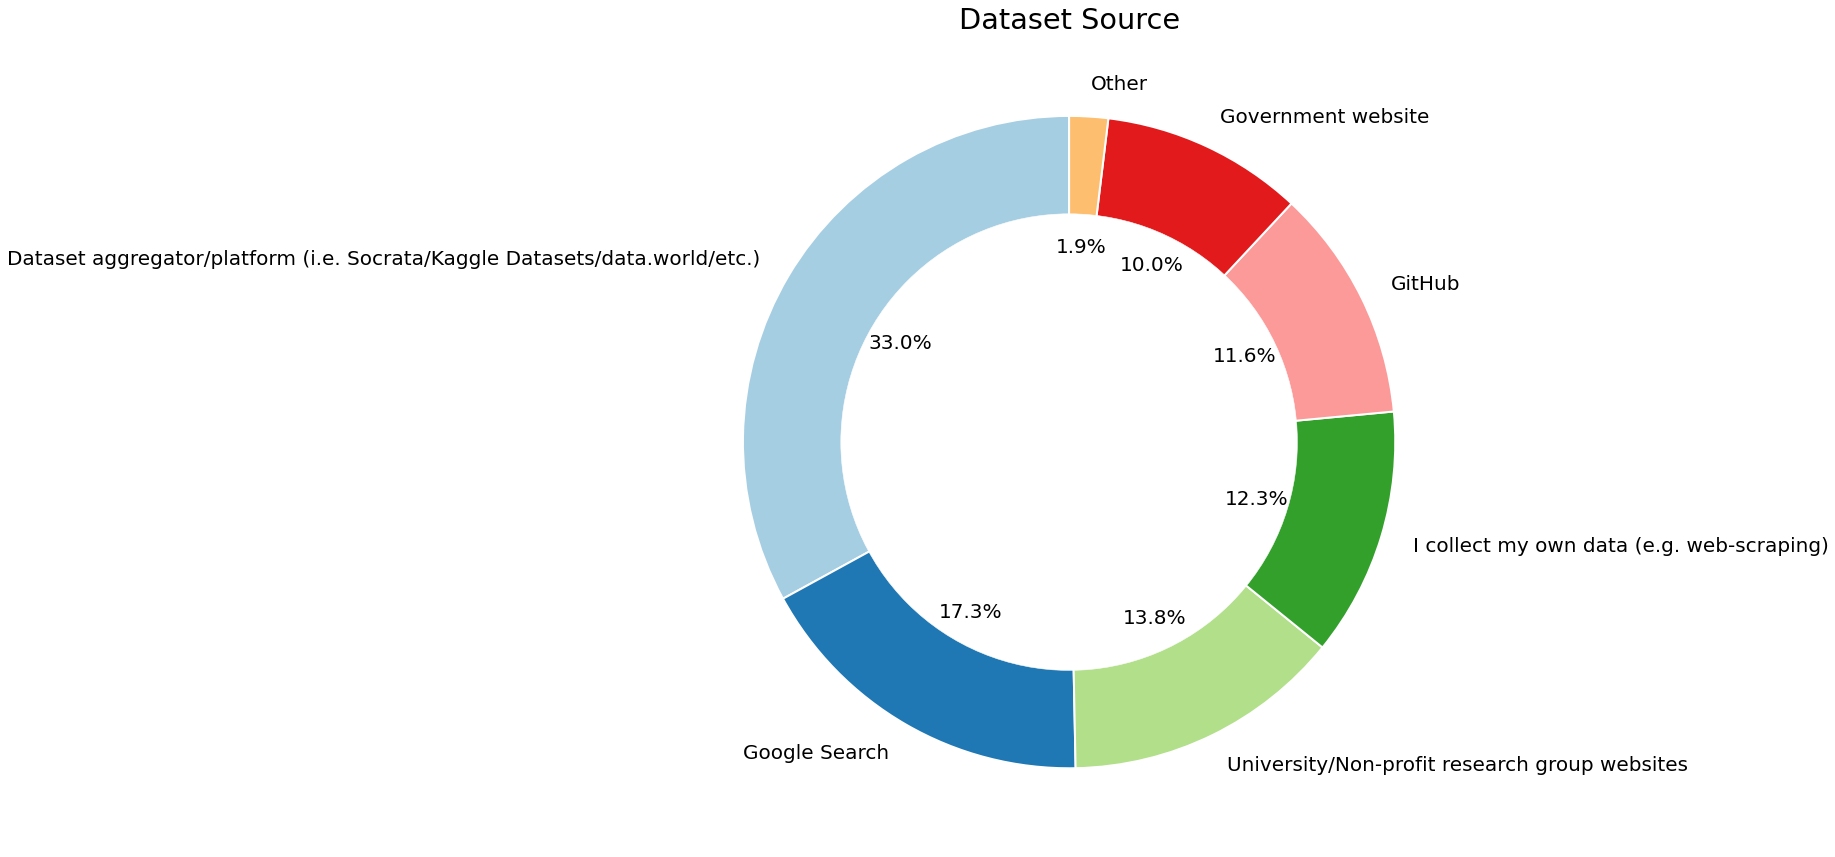

In [26]:
plt.subplots(figsize=(15,15))
data=response['PublicDatasetsSelect'].str.split(',')
dataset=[]
for i in data.dropna():
    dataset.extend(i)

pd.Series(dataset).value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette('Paired',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title('Dataset Source')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

## Code Sharing

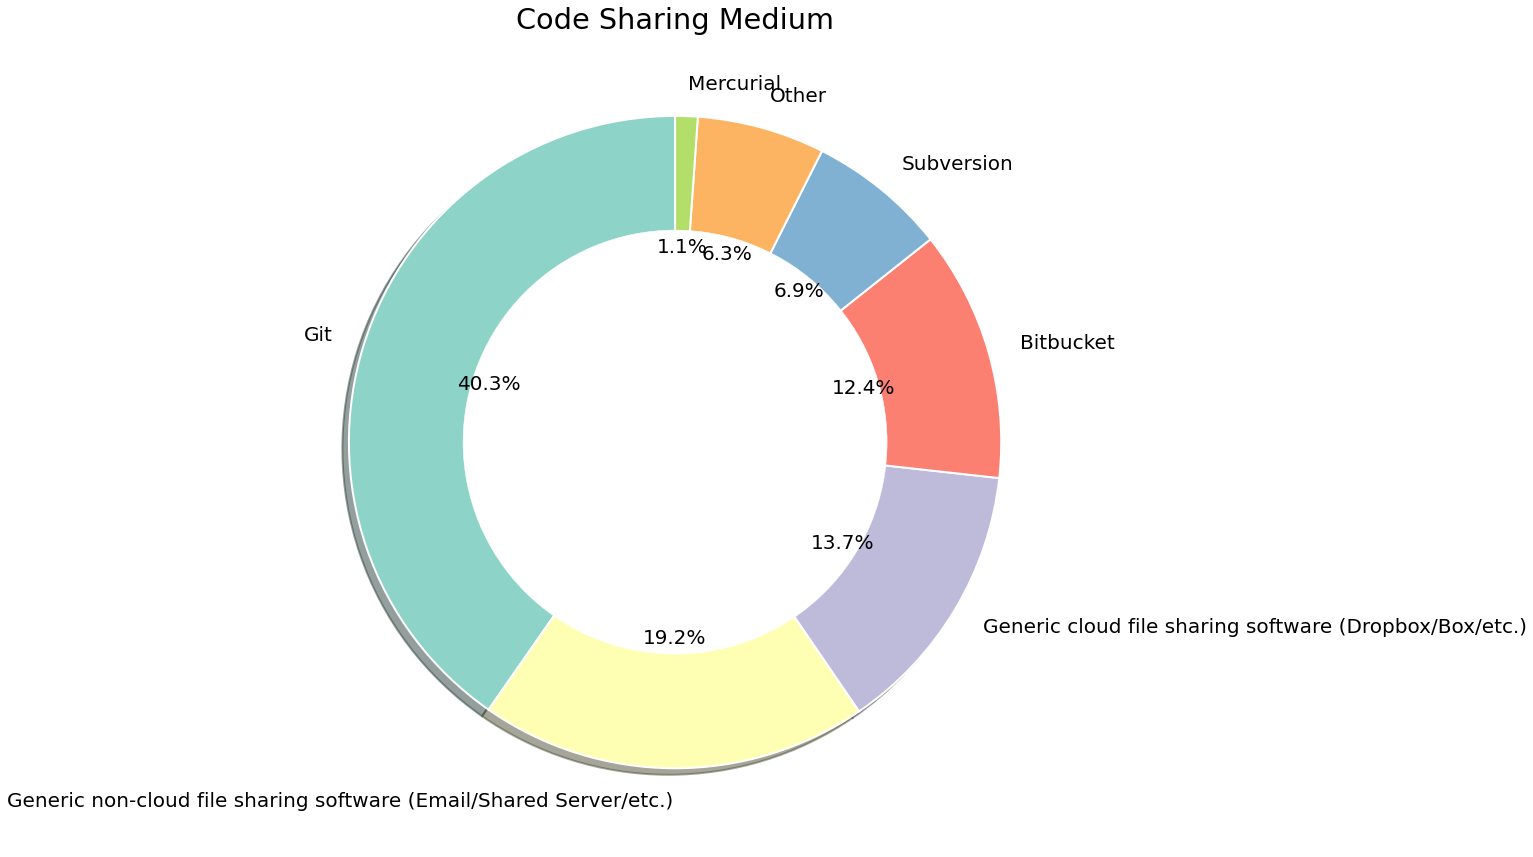

In [27]:
plt.subplots(figsize=(15,15))
code=response['WorkCodeSharing'].str.split(',')
code_share=[]
for i in code.dropna():
    code_share.extend(i)
pd.Series(code_share).value_counts().plot.pie(autopct='%1.1f%%',shadow=True,colors=sns.color_palette('Set3',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title('Code Sharing Medium')
my_circle=plt.Circle( (0,0), 0.65, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

## Challenges in Data Science

데이터 사이언스의 주요 과제



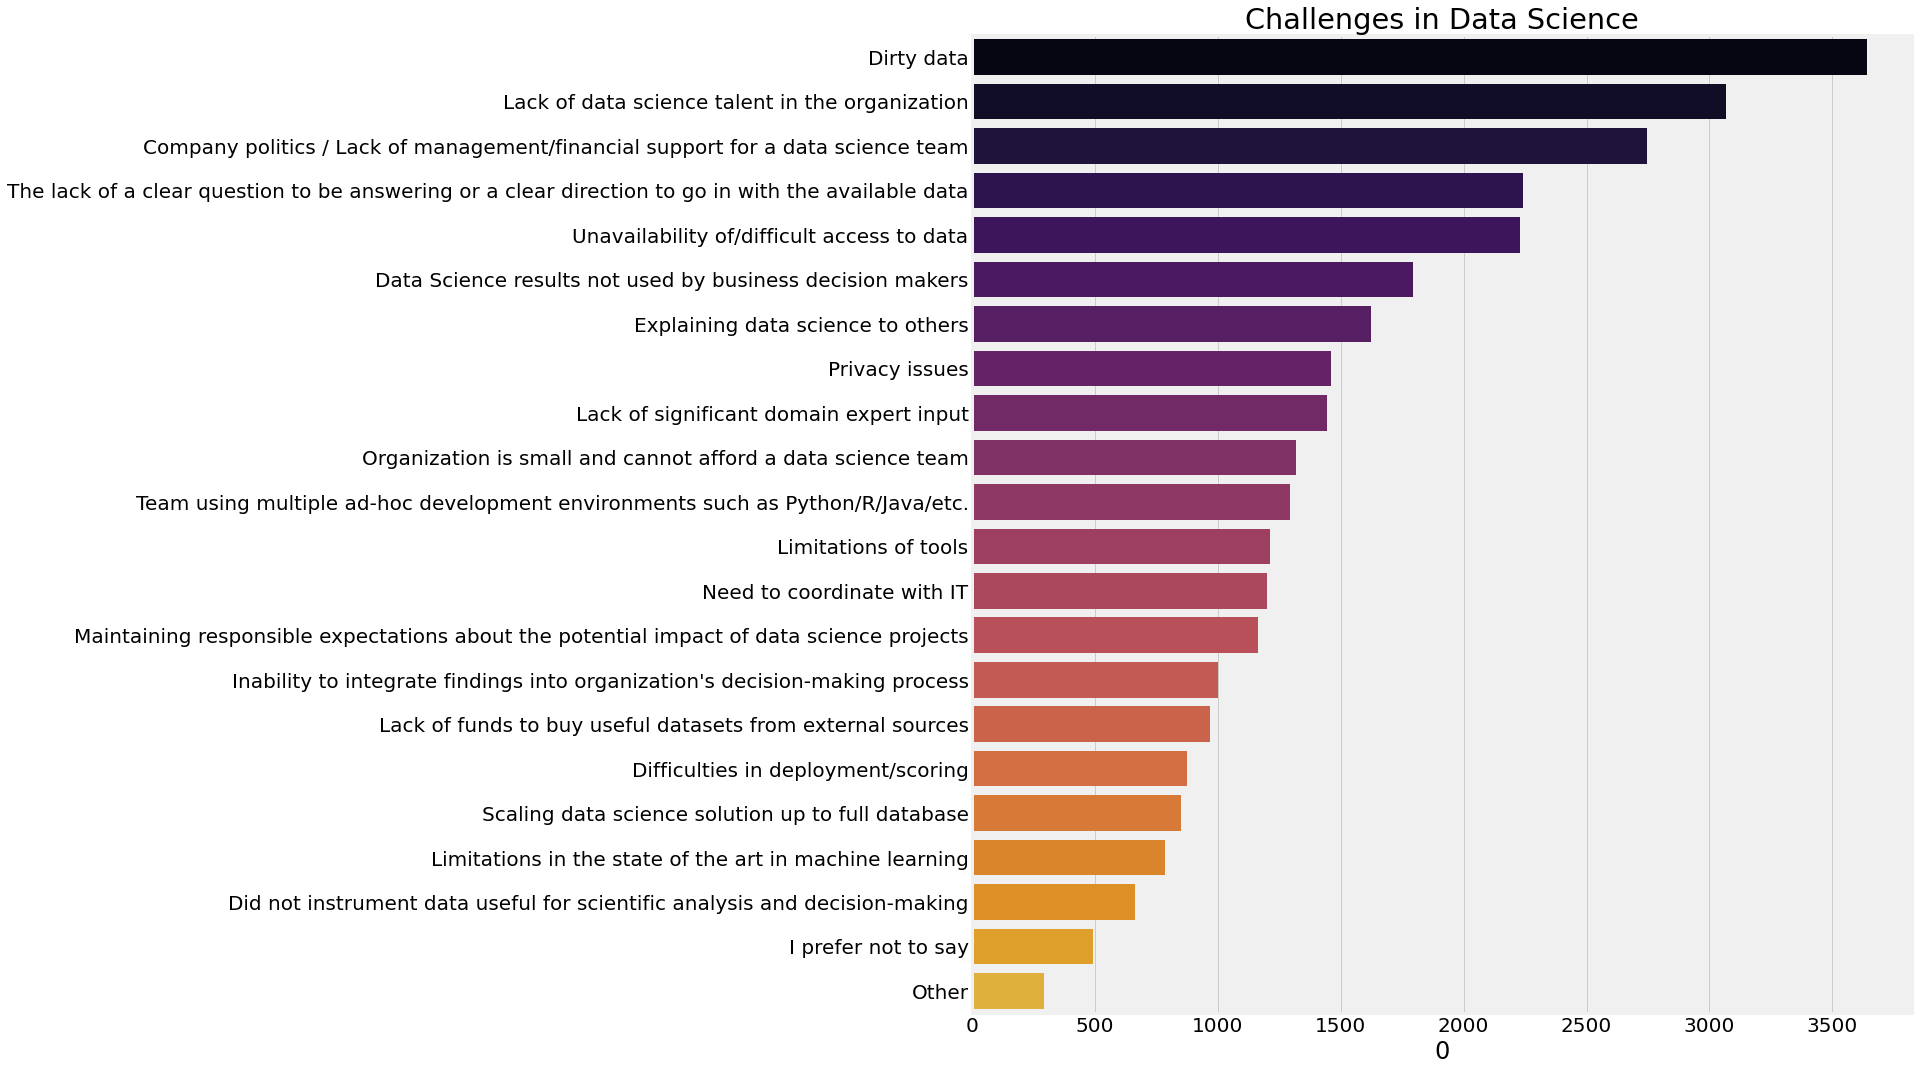

In [28]:
plt.subplots(figsize=(15,18))
challenge=response['WorkChallengesSelect'].str.split(',')
challenges=[]
for i in challenge.dropna():
    challenges.extend(i)
plt1=pd.Series(challenges).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,palette=sns.color_palette('inferno',25))
plt.title('Challenges in Data Science')
plt.show()

데이터 사이언스의 주요 과제는 적절한 데이터를 얻는 것입니다. 그래프는 더러운 데이터가 큰 문제라는 것을 분명히 보여준다. 이제 더러운 데이터란 무엇일까요? 더티 데이터는 오류를 포함하는 데이터베이스 레코드입니다. 더티 데이터는 중복 레코드, 불완전하거나 오래된 데이터, 서로 다른 시스템의 레코드 필드에 대한 잘못된 구문 분석 등 여러 가지 요인으로 인해 발생할 수 있습니다. 다행히도 Kaggle 데이터 세트는 꽤 깨끗하고 표준화되어 있습니다.

다른 주요 과제로는 데이터 과학 및 기계 학습 능력 부족, 데이터 확보의 어려움, 도구 부족 등이 있습니다. 데이터 사이언스가 21세기 가장 섹시한 직업인 이유다.데이터의 양이 증가함에 따라 이러한 수요는 크게 증가할 것입니다.

## Job Satisfaction

In [29]:
response['JobSatisfaction'].head(5)

0                        5
1                      NaN
2                      NaN
3    10 - Highly Satisfied
4                        2
Name: JobSatisfaction, dtype: object

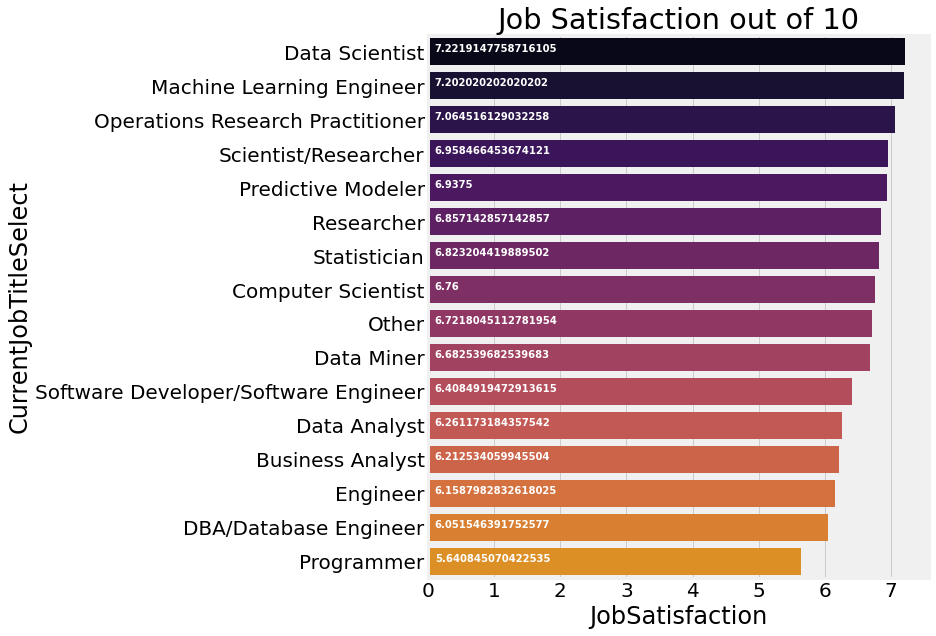

In [30]:
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
ax=sns.barplot(y=satisfy_job.index,x=satisfy_job.JobSatisfaction,palette=sns.color_palette('inferno',20))
fig=plt.gcf()
fig.set_size_inches(8,10)
for i, v in enumerate(satisfy_job.JobSatisfaction): 
    ax.text(.1, i, v,fontsize=10,color='white',weight='bold')
plt.title('Job Satisfaction out of 10')
plt.show()

데이터 사이언티스트와 머신러닝 엔지니어는 가장 만족도가 높은 사람(그렇게 많은 돈을 받고 기뻐하지 않을 사람)이며 프로그래머는 가장 낮은 직업 만족도를 보입니다. 하지만 여기서 주목해야 할 점은 컴퓨터 과학자가 프로그래머보다 낮은 연봉을 받더라도 프로그래머보다 좋은 직업 만족도를 가지고 있다는 것이다. 따라서 급여가 유일한 기준이나 직업 만족은 아니다.

## Job Satisfication By Country

In [31]:
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['Country'])['JobSatisfaction'].mean().sort_values(ascending=True).to_frame()
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = 'Viridis',
        reversescale = True,
        showscale = True,
        locations = satisfy_job.index,
        z = satisfy_job['JobSatisfaction'],
        locationmode = 'country names',
        text = satisfy_job['JobSatisfaction'],
        marker = dict(
            line = dict(color = 'rgb(200,200,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Satisfaction')
            )
       ]

layout = dict(
    title = 'Job Satisfaction By Country',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(0,0,255)',
        projection = dict(
        type = 'chloropleth',
            
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

## Python vs R or (Batman vs Superman)

Python과 R은 데이터 과학 및 기계 학습에 가장 널리 사용되는 오픈 소스 언어입니다. 데이터 과학자나 분석가에게 있어 가장 큰 의문점은 다음과 같습니다. 어떤 언어로 시작해야 할까요? 두 언어 모두 나름의 장단점이 있지만 개인이 선택한 언어를 선택하면서 목적에 따라 다르다. 두 언어 모두 다른 종류의 작업에 대한 요구를 충족시킵니다. 파이썬은 범용 언어이므로 웹과 응용 프로그램의 통합이 더 쉽지만 R은 순수 통계 및 분석 목적을 위한 것이다. R이 파이썬을 완전히 이길 영역은 ggplot2와 샤이니와 같은 패키지의 도움을 받는 시각화이다. 하지만 파이썬은 머신러닝 분야에서 우위를 점하고 있다. 그럼 조사원들이 뭐라고 하는지 봅시다.

In [32]:
response['WorkToolsSelect'].head(5)

0    Amazon Web services,Oracle Data Mining/ Oracle...
1                                                  NaN
2                                                  NaN
3    Amazon Machine Learning,Amazon Web services,Cl...
4    C/C++,Jupyter notebooks,MATLAB/Octave,Python,R...
Name: WorkToolsSelect, dtype: object

In [33]:
resp=response.dropna(subset=['WorkToolsSelect'])
resp=resp.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
resp

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,originCountry,exchangeRate
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,Self-employed,TensorFlow,Neural Nets,Python,I collect my own data (e.g. web-scraping),"Blogs,College/University,Conferences,Friends n...",NaN,Very useful,Very useful,NaN,Very useful,Very useful,NaN,NaN,NaN,Very useful,Very useful,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,KDnuggets Blog,NaN,NaN,NaN,NaN,NaN,...,Often,Often,Often,Often,Often,NaN,100% of projects,Entirely internal,Standalone Team,Electricity data sets from government and states,"Everything is custom, there is never a tool th...","Column-oriented relational (e.g. KDB/MariaDB),...","Company Developed Platform,Email",NaN,Generic cloud file sharing software (Dropbox/B...,NaN,250000,USD,Has increased 20% or more,10 - Highly Satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USD,1.000000
2,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,Employed by a company that doesn't perform adv...,TensorFlow,Text Mining,Python,GitHub,"Arxiv,Conferences,Kaggle,Textbook",Very useful,NaN,NaN,NaN,Somewhat useful,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,"Data Machina Newsletter,Jack's Import AI Newsl...",Na

In [34]:
python=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(~resp['WorkToolsSelect'].str.contains('R'))]
R=resp[(~resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
both=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]

### Recommended Language For Begineers

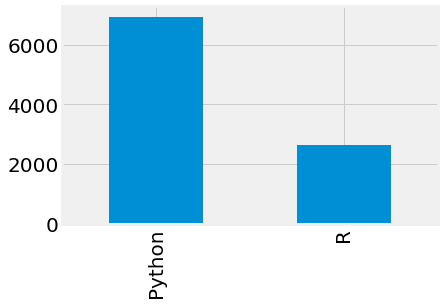

In [35]:
response['LanguageRecommendationSelect'].value_counts()[:2].plot.bar()
plt.show()

## Recommendation By Python and R users

In [ ]:
labels1=python['LanguageRecommendationSelect'].value_counts()[:5].index
sizes1=python['LanguageRecommendationSelect'].value_counts()[:5].values

labels2=R['LanguageRecommendationSelect'].value_counts()[:5].index
sizes2=R['LanguageRecommendationSelect'].value_counts()[:5].values


fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": sizes2 ,
      "labels": labels2,
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Language Recommended By Python and R users",
        "annotations": [
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "Python",
                "x": 0.17,
                "y": 0.5
            },
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "R",
                "x": 0.79,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')

이것은 흥미로운 발견입니다. 약 91.6%의 파이썬 사용자가 초보자를 위한 첫 번째 언어로 파이썬을 추천하는 반면, 67.2%의 R 사용자만이 R을 첫 번째 언어로 추천한다. 또한 20.6%의 R 사용자가 파이썬을 추천하지만 1.68%의 파이썬 사용자만이 R을 모국어로 추천한다. 유의할 점은 SQL, Matlab 및 C/C++와 같은 두 언어의 사용자가 동일한 언어를 추천한다는 것입니다. 저는 상위 5개 추천 언어만 고려했기 때문에, 모두 고려한다면 비율이 달라질 것입니다. 하지만 차이는 2~3%에 불과할 것입니다.

### Necessary or Not??

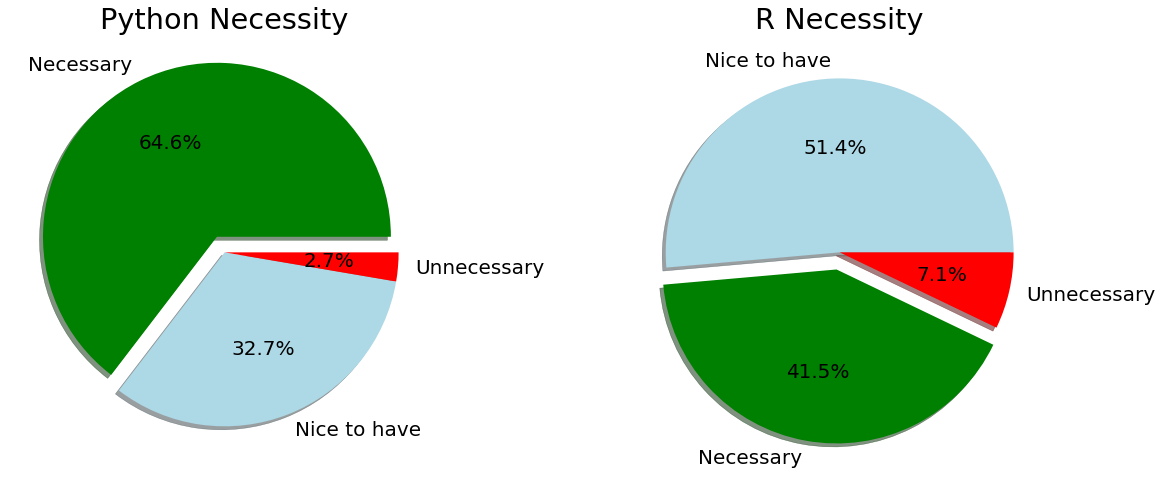

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))
response['JobSkillImportancePython'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0.1,0,0],shadow=True,colors=['g','lightblue','r'])
ax[0].set_title('Python Necessity')
ax[0].set_ylabel('')
response['JobSkillImportanceR'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0,0.1,0],shadow=True,colors=['lightblue','g','r'])
ax[1].set_title('R Necessity')
ax[1].set_ylabel('')
plt.show()

분명히 파이썬은 R에 비해 훨씬 더 필요한 기술이다.

### Number Of Users By Language

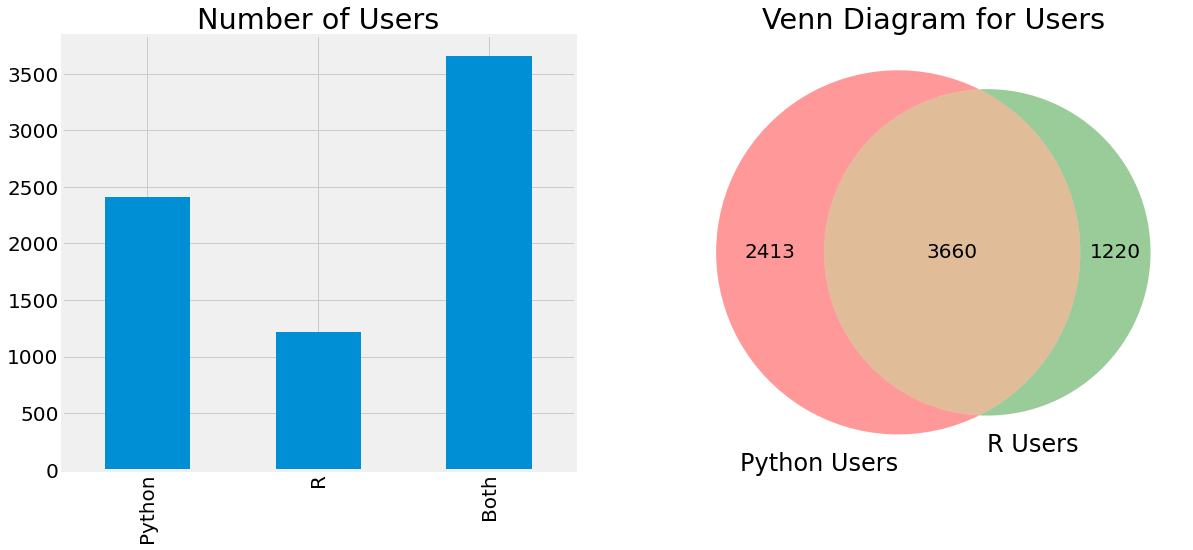

In [38]:
# 코드 저장
f,ax=plt.subplots(1,2,figsize=(18,8))
pd.Series([python.shape[0],R.shape[0],both.shape[0]],index=['Python','R','Both']).plot.bar(ax=ax[0])
ax[0].set_title('Number of Users')
venn2(subsets = (python.shape[0],R.shape[0],both.shape[0]), set_labels = ('Python Users', 'R Users'))
plt.title('Venn Diagram for Users')
plt.show()

## Compensation

In [39]:
py_sal=(pd.to_numeric(python['CompensationAmount'].dropna())*python['exchangeRate']).dropna()
py_sal=py_sal[py_sal<1000000]
R_sal=(pd.to_numeric(R['CompensationAmount'].dropna())*R['exchangeRate']).dropna()
R_sal=R_sal[R_sal<1000000]
both_sal=(pd.to_numeric(both['CompensationAmount'].dropna())*both['exchangeRate']).dropna()
both_sal=both_sal[both_sal<1000000]
trying=pd.DataFrame([py_sal,R_sal,both_sal])
trying=trying.transpose()
trying.columns=['Python','R','Both']
print('Median Salary For Individual using Python:',trying['Python'].median())
print('Median Salary For Individual using R:',trying['R'].median())
print('Median Salary For Individual knowing both languages:',trying['Both'].median())

Median Salary For Individual using Python: 48725.600000000006
Median Salary For Individual using R: 48421.99999999999
Median Salary For Individual knowing both languages: 59791.3


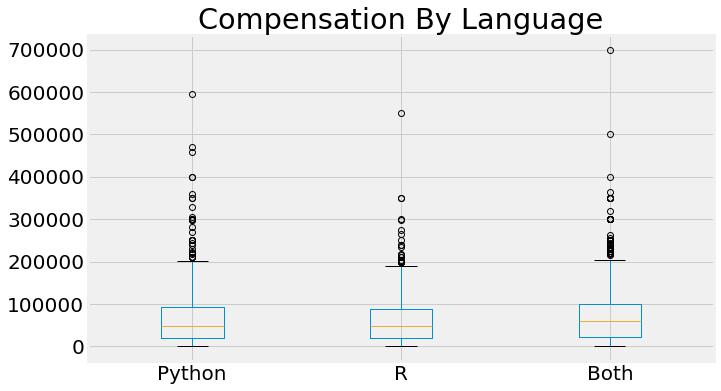

In [40]:
trying.plot.box()
plt.title('Compensation By Language')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

파이썬 코더는 R 코더에 비해 중간 급여가 약간 높습니다. 하지만 이 두 언어를 모두 알고 있는 사람들은 두 언어에 비해 중간 정도의 급여가 꽤 높습니다.

## Language Used By Professionals

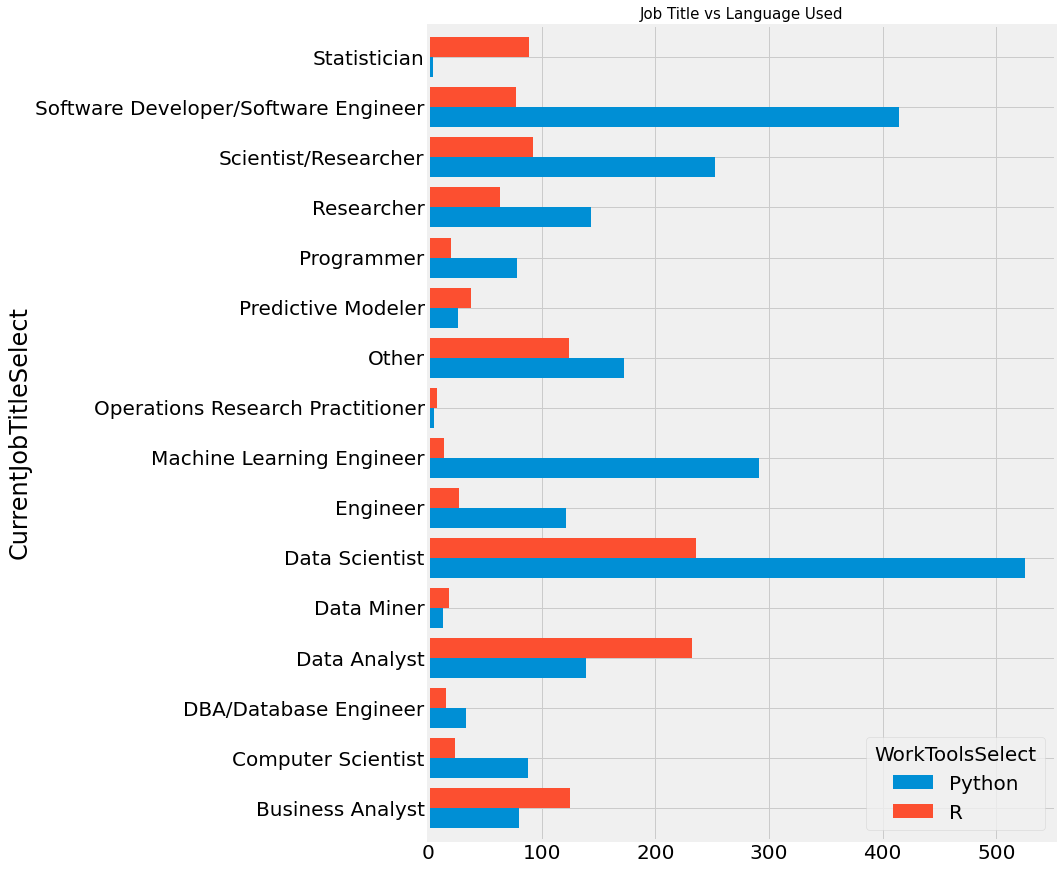

In [41]:
# 코드 저장
py1=python.copy()
r=R.copy()
py1['WorkToolsSelect']='Python'
r['WorkToolsSelect']='R'
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['CurrentJobTitleSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('CurrentJobTitleSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Title vs Language Used',size=15)
plt.show()

앞서 언급했듯이 R은 비주얼에서 Python을 이겼습니다. 따라서 데이터 분석가, 비즈니스 분석가와 같은 직책을 가진 사람들은 그래프와 비주얼이 매우 중요한 역할을 하는 Python보다 R을 선호한다. 마찬가지로 통계학자의 거의 90%가 R을 사용합니다. 또한 앞에서 언급했듯이 파이썬은 머신러닝 분야에서 더 뛰어나기 때문에 머신러닝 엔지니어, 데이터 과학자, DBA나 프로그래머와 같은 사람들은 R보다 파이썬을 선호한다.

따라서 데이터 비주얼--->R 그렇지 않으면-->파이톤이다.

참고: 이 그래프는 전문가가 권장하는 언어용이 아니라 전문가가 사용하는 도구입니다.

## Job Function vs Language

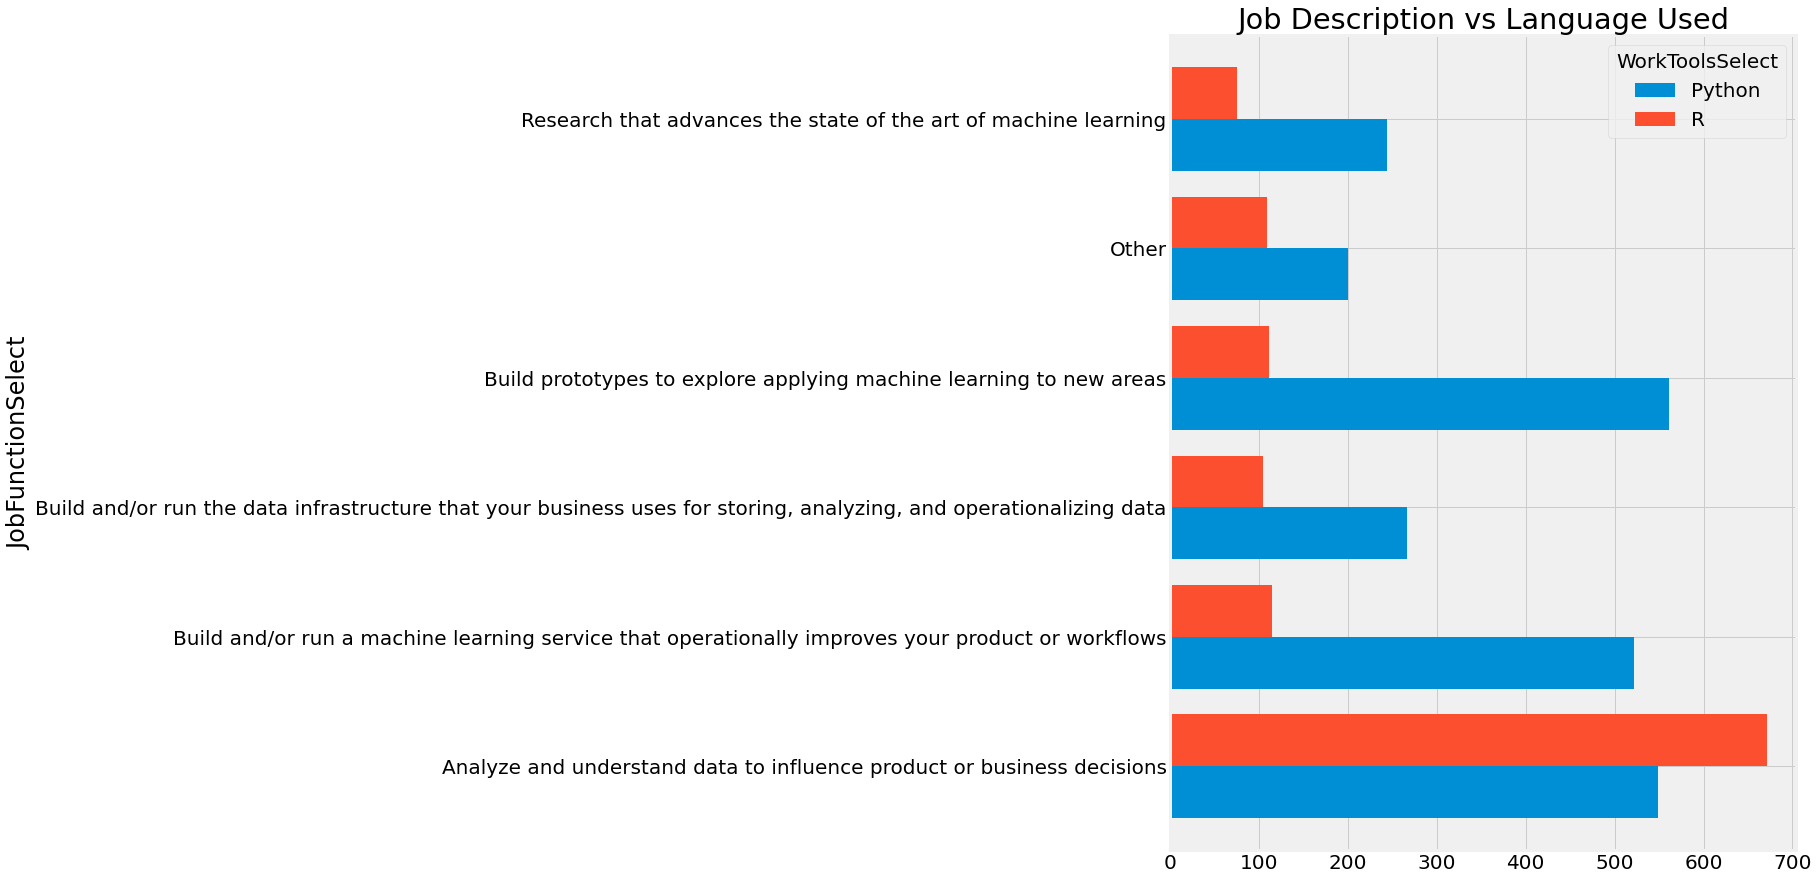

In [42]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['JobFunctionSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('JobFunctionSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Description vs Language Used')
plt.show()

## Tenure vs Language Used

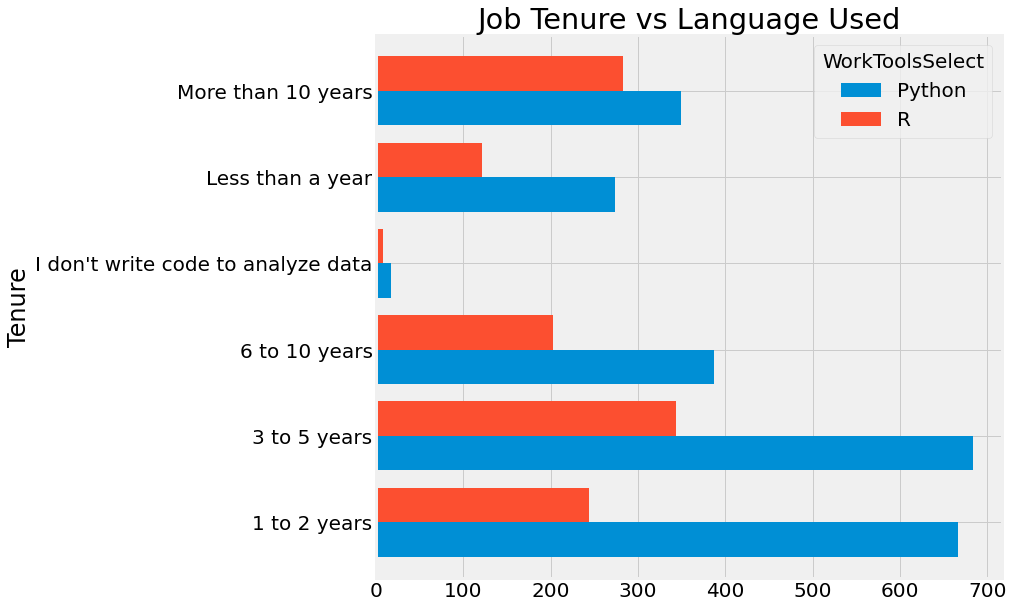

In [43]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['Tenure','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('Tenure','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Job Tenure vs Language Used')
plt.show()

## Industry vs Language Used

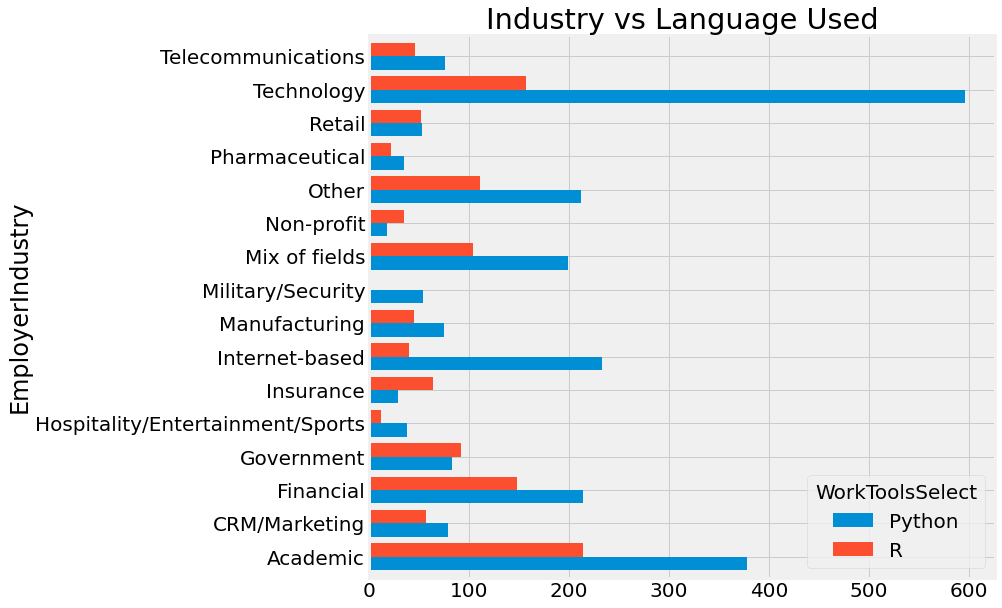

In [44]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['EmployerIndustry','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('EmployerIndustry','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Industry vs Language Used')
plt.show()

In [47]:
r_vs_py.head(10)

,EmployerIndustry,WorkToolsSelect,Age
0,Academic,Python,378
1,Academic,R,214
2,CRM/Marketing,Python,79
3,CRM/Marketing,R,57
4,Financial,Python,214
5,Financial,R,148
6,Government,Python,83
7,Government,R,92
8,Hospitality/Entertainment/Sports,Python,38
9,Hospitality/Entertainment/Sports,R,12


## Common Tools with Python and R

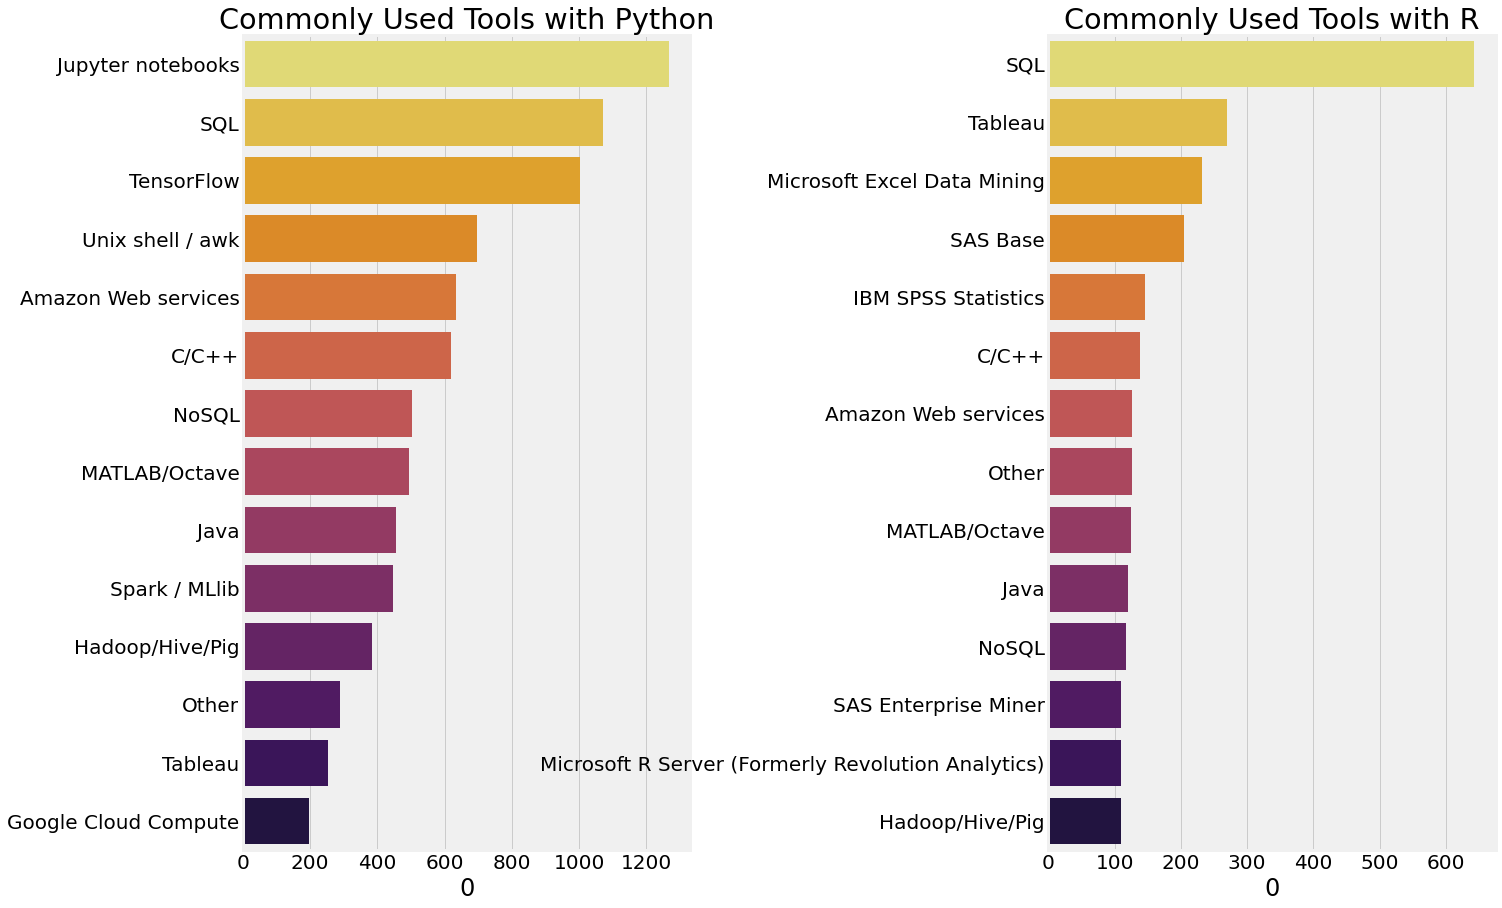

In [48]:
f,ax=plt.subplots(1,2,figsize=(20,15))
py_comp=python['WorkToolsSelect'].str.split(',')
py_comp1=[]
for i in py_comp:
    py_comp1.extend(i)
plt1=pd.Series(py_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('inferno_r',15))
R_comp=R['WorkToolsSelect'].str.split(',')
R_comp1=[]
for i in R_comp:
    R_comp1.extend(i)
plt1=pd.Series(R_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
ax[0].set_title('Commonly Used Tools with Python')
ax[1].set_title('Commonly Used Tools with R')
plt.subplots_adjust(wspace=0.8)
plt.show()

## Asking the Data Scientists

In [49]:
response['DataScienceIdentitySelect'].value_counts()

No                        5314
Yes                       4257
Sort of (Explain more)    3100
Name: DataScienceIdentitySelect, dtype: int64

### Current Job Titles

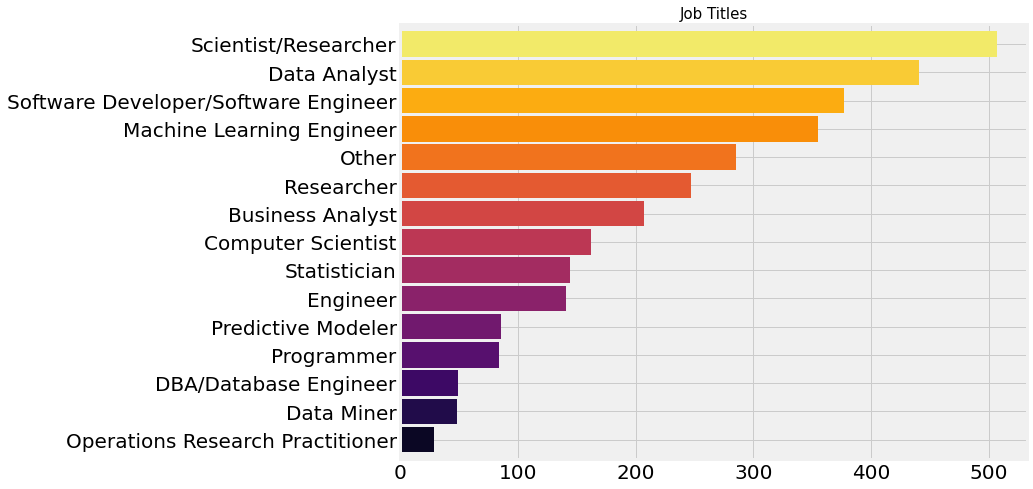

In [50]:
plt.subplots(figsize=(10,8))
scientist=response[response['DataScienceIdentitySelect']=='Yes']
scientist['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',15))
plt.title('Job Titles',size=15)
plt.show()

In [51]:
true=response[response['CurrentJobTitleSelect']=='Data Scientist']

In [52]:
scientist=pd.concat([scientist,true])
scientist['CurrentJobTitleSelect'].shape[0]

6690

So out of the total respondents, about 40% of them are Data Scientists or have skills for the same.

### Country-Wise Split

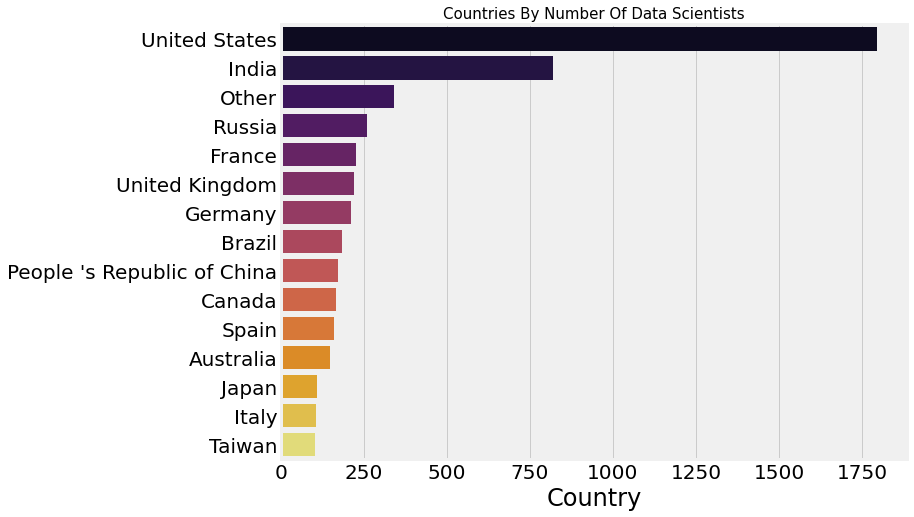

In [53]:
plt.subplots(figsize=(10,8))
coun=scientist['Country'].value_counts()[:15].sort_values(ascending=False).to_frame()
sns.barplot(coun.Country,coun.index,palette='inferno')
plt.title('Countries By Number Of Data Scientists',size=15)
plt.show()

### Employment Status & Education

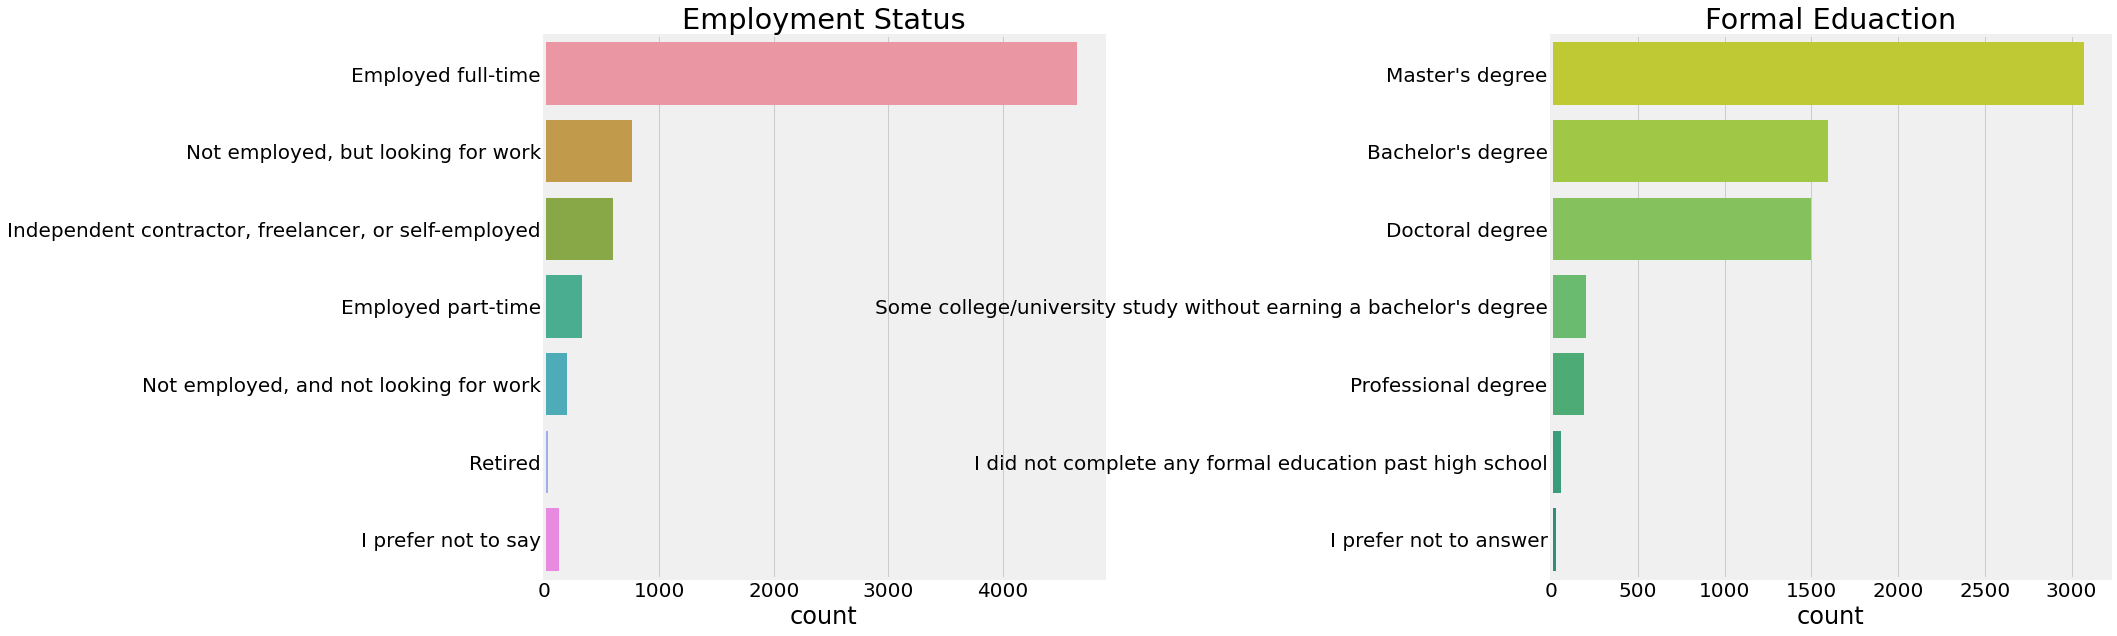

In [54]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(y=scientist['EmploymentStatus'],ax=ax[0])
ax[0].set_title('Employment Status')
ax[0].set_ylabel('')
sns.countplot(y=scientist['FormalEducation'],order=scientist['FormalEducation'].value_counts().index,ax=ax[1],palette=sns.color_palette('viridis_r',15))
ax[1].set_title('Formal Eduaction')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

데이터 과학자의 약 67%가 정규직으로 고용되어 있으며, 이들 중 약 11~12%가 실직 상태이지만 일자리를 찾고 있다. 교육 측면에서는 데이터 과학자의 약 45-46%가 석사 학위를 가지고 있는 반면, 약 23-24%는 학사 또는 박사 학위를 가지고 있다. 따라서 교육은 데이터 과학자가 되기 위한 중요한 요소로 보인다. 교육에 따라 급여가 어떻게 달라지는지 봅시다.

### Compensation By Formal Education

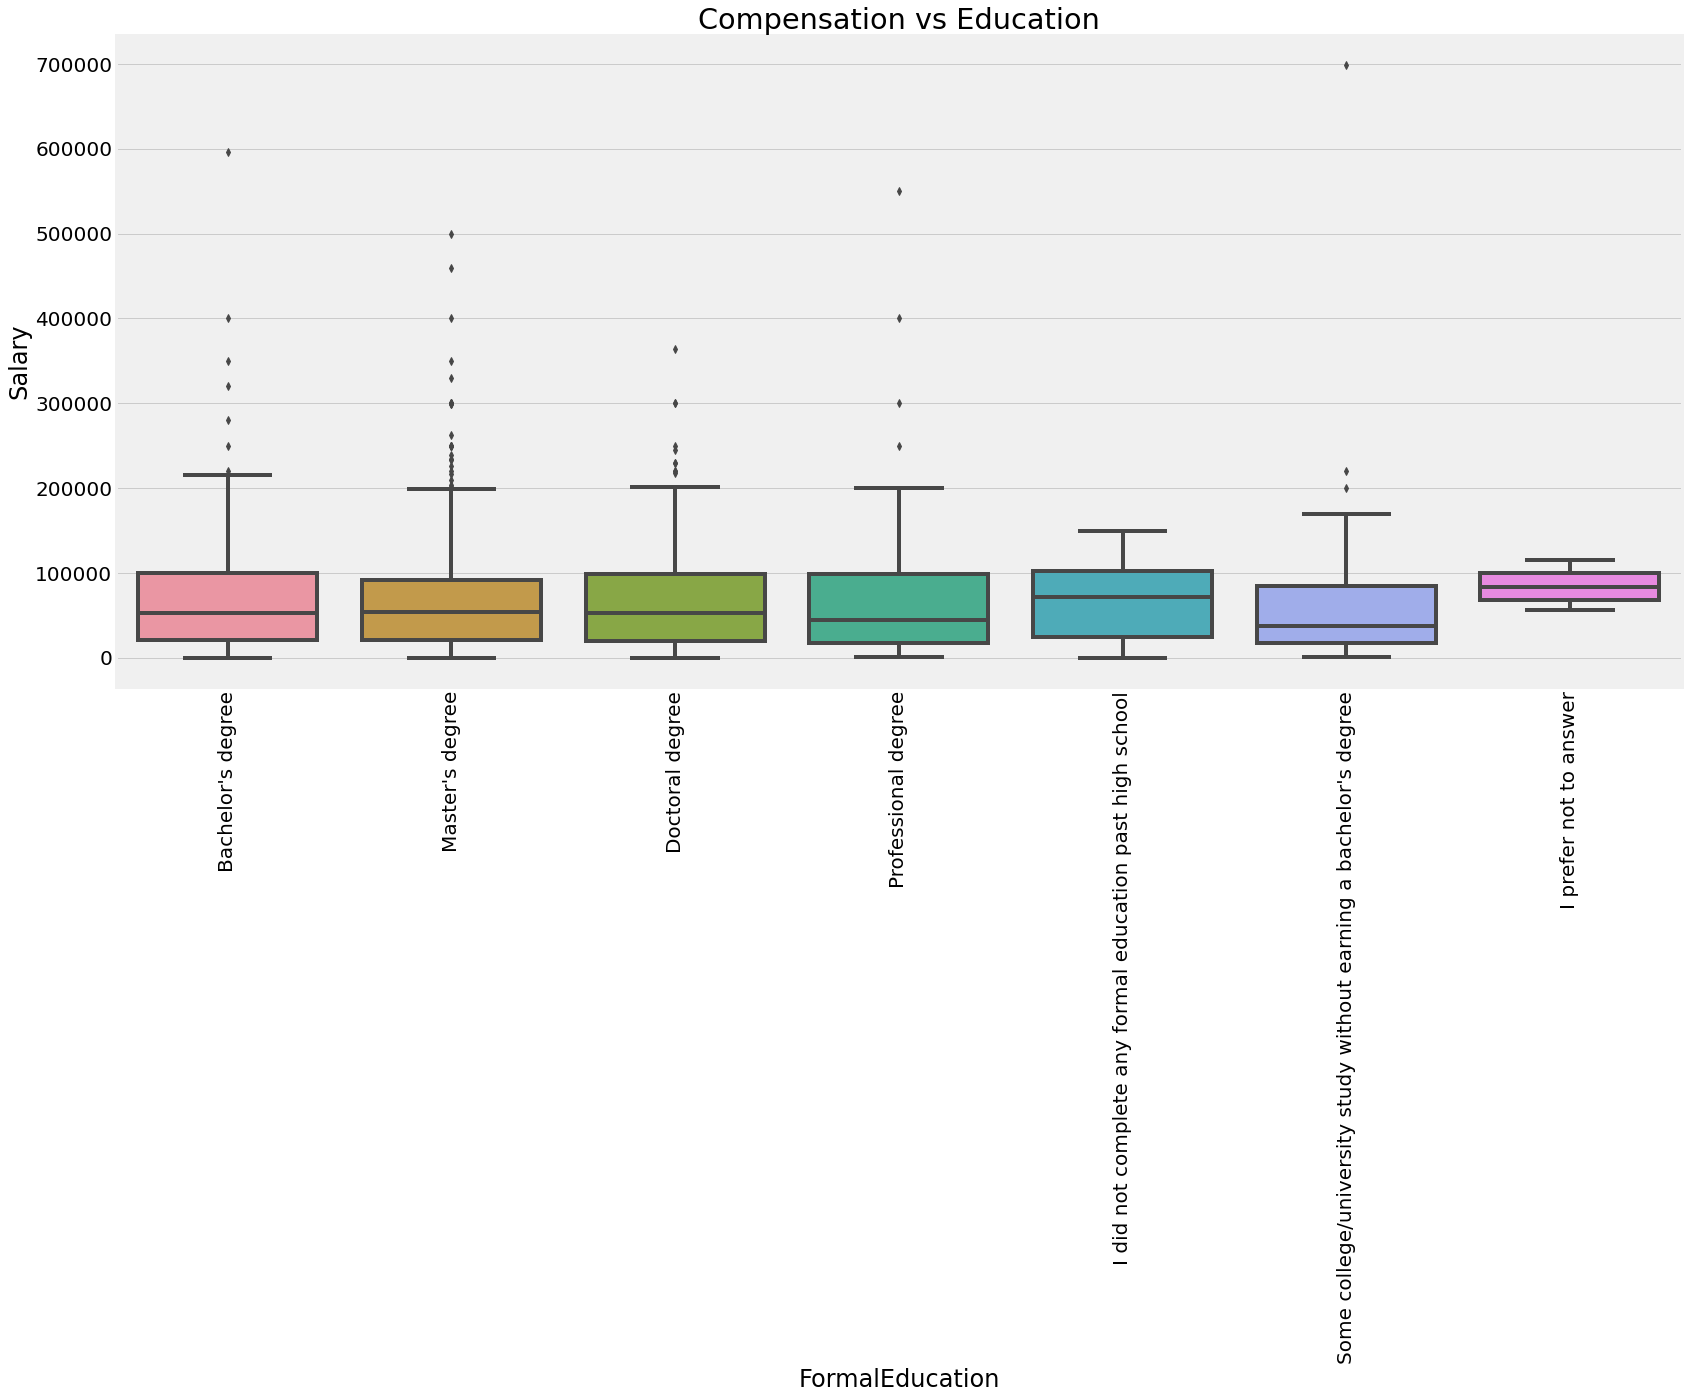

In [55]:
plt.subplots(figsize=(25,12))
comp_edu=scientist.merge(salary,left_index=True,right_index=True,how='left')
comp_edu=comp_edu[['FormalEducation','Salary']]
sns.boxplot(x='FormalEducation',y='Salary',data=comp_edu)
plt.title('Compensation vs Education')
plt.xticks(rotation=90)
plt.show()

이것은 놀랍다. 왜냐하면 학사, 석사, 박사 학위의 급여 범위가 매우 비슷하기 때문이다. 석박사 학위와 비교했을 때 학사 학위의 중간값이 조금 높은 것 같습니다. 많은 데이터 과학자들이 석사 학위를 가지고 있기 때문에 나는 이것을 예상하지 못했다. 하지만 저는 그 어떤 학위보다도 경력이 중요하다고 생각합니다. 아마 학사 학위 소지자들은 다른 두 명보다 경험이 더 많을 거예요.

### Previous Job and Salary Change

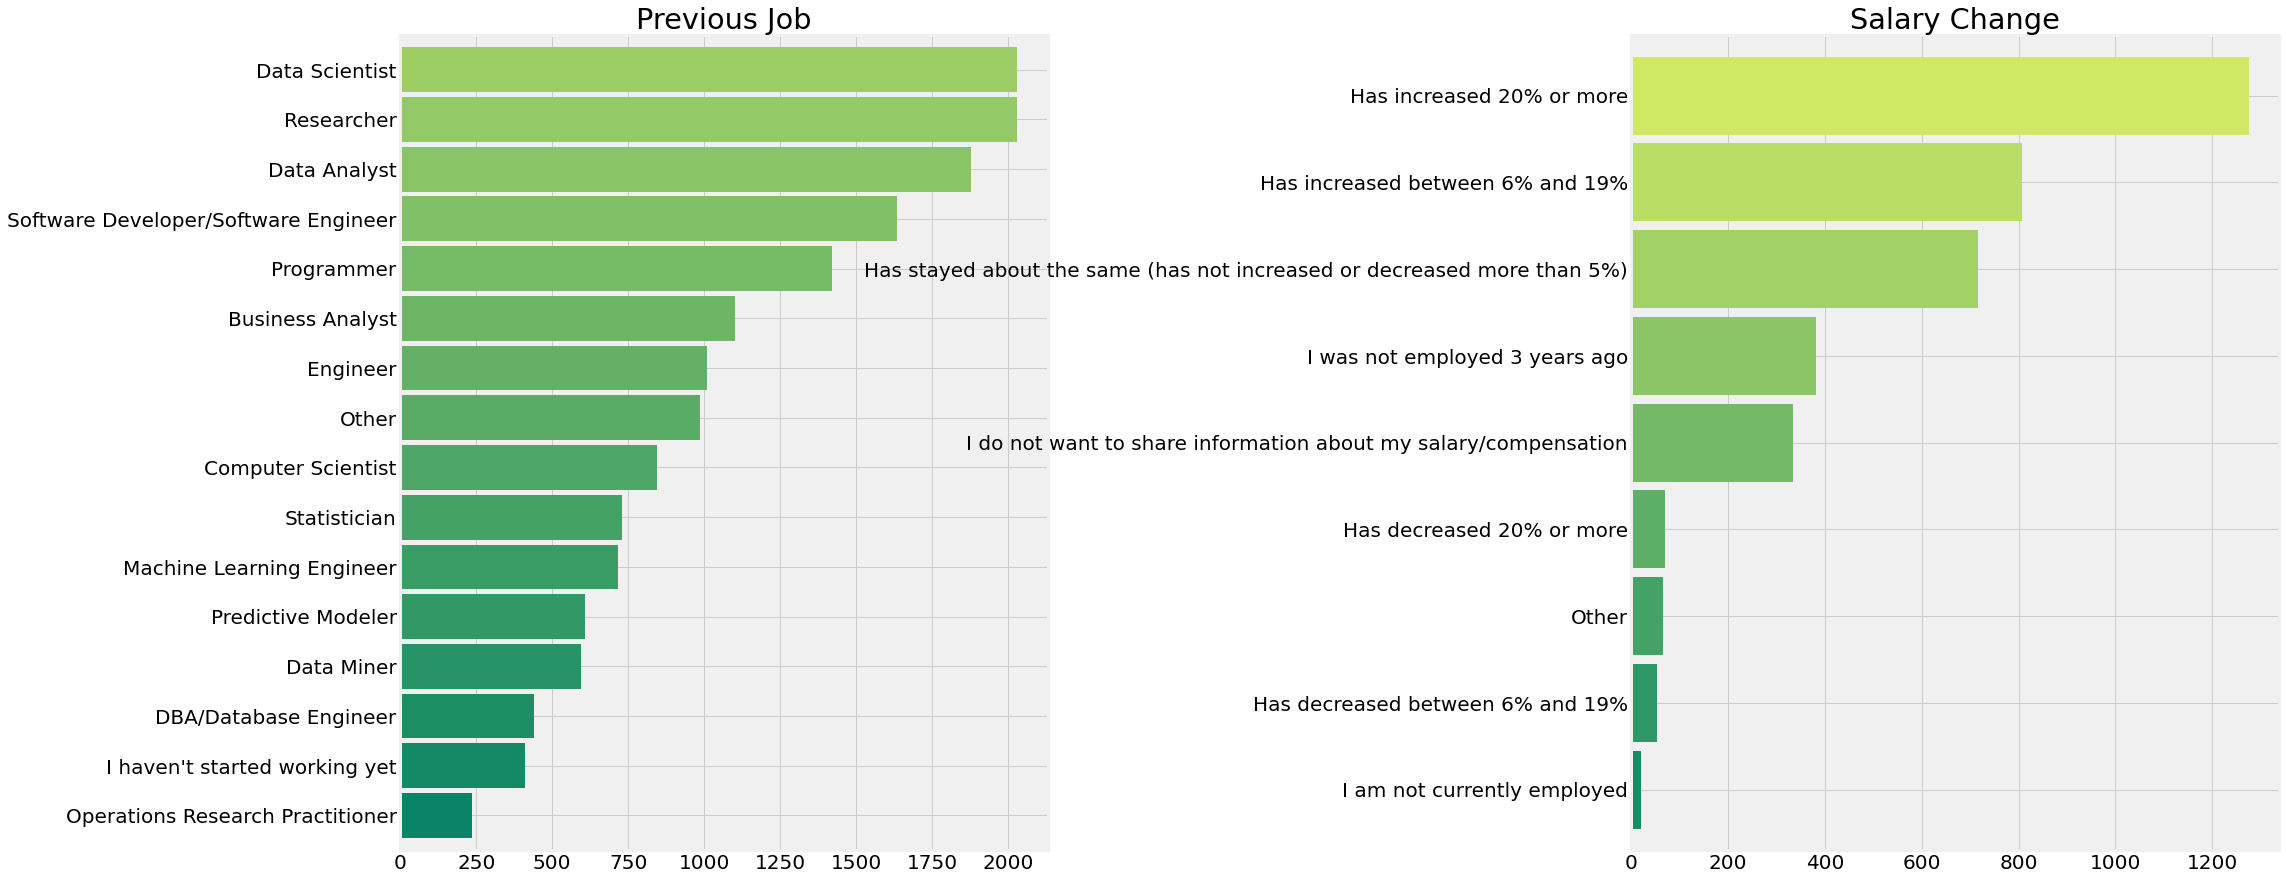

In [58]:
f,ax=plt.subplots(1,2,figsize=(30,15))
past=scientist['PastJobTitlesSelect'].str.split(',')
past_job=[]
for i in past.dropna():
    past_job.extend(i)
pd.Series(past_job).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',25),ax=ax[0])
ax[0].set_title('Previous Job')
sal=scientist['SalaryChange'].str.split(',')
sal_change=[]
for i in sal.dropna():
    sal_change.extend(i)
pd.Series(sal_change).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',10),ax=ax[1])
ax[1].set_title('Salary Change')
plt.subplots_adjust(wspace=0.9)
plt.show()

### Tools used at Work

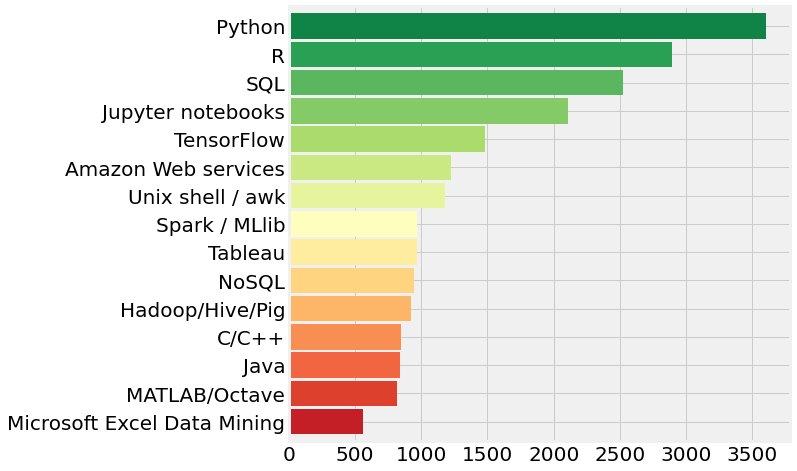

In [59]:
plt.subplots(figsize=(8,8))
tools=scientist['WorkToolsSelect'].str.split(',')
tools_work=[]
for i in tools.dropna():
    tools_work.extend(i)
pd.Series(tools_work).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('RdYlGn',15))
plt.show()

### Where Did they Learn From??

In [ ]:
course=scientist['CoursePlatformSelect'].str.split(',')
course_plat=[]
for i in course.dropna():
    course_plat.extend(i)
course_plat=pd.Series(course_plat).value_counts()
blogs=scientist['BlogsPodcastsNewslettersSelect'].str.split(',')
blogs_fam=[]
for i in blogs.dropna():
    blogs_fam.extend(i)
blogs_fam=pd.Series(blogs_fam).value_counts()
labels1=course_plat.index
sizes1=course_plat.values

labels2=blogs_fam[:5].index
sizes2=blogs_fam[:5].values


fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "MOOC",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": sizes2 ,
      "labels": labels2,
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Blog",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Blogs and Online Platforms",
        "showlegend":True,
        "annotations": [
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "MOOC's",
                "x": 0.18,
                "y": 0.5
            },
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "BLOGS",
                "x": 0.83,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')

Coursera는 데이터 사이언티스트가 데이터 사이언스를 학습하기 위해 가장 선호하는 플랫폼입니다. 제 개인적인 투표는 여러분이 처음부터 발전까지 같은 플랫폼에서 배울 수 있는 Coursera에게도 적용됩니다. 파이썬이나 R 같은 단일 언어에 국한되지 않고 스칼라 등 다른 언어에 대한 강좌도 개설되어 있다. 마찬가지로, KDNuggets가 가장 선호하는 블로그이다.

### Time Spent on Tasks 작업에 소요된 시간
데이터 과학자는 항상 예측 모델을 구축하는 것이 아니라 올바른 데이터, 분석 등을 수집하여 데이터 품질을 책임집니다. 데이터 과학자가 이러한 다양한 작업에 얼마나 많은 시간을 할애하는지 살펴보겠습니다.

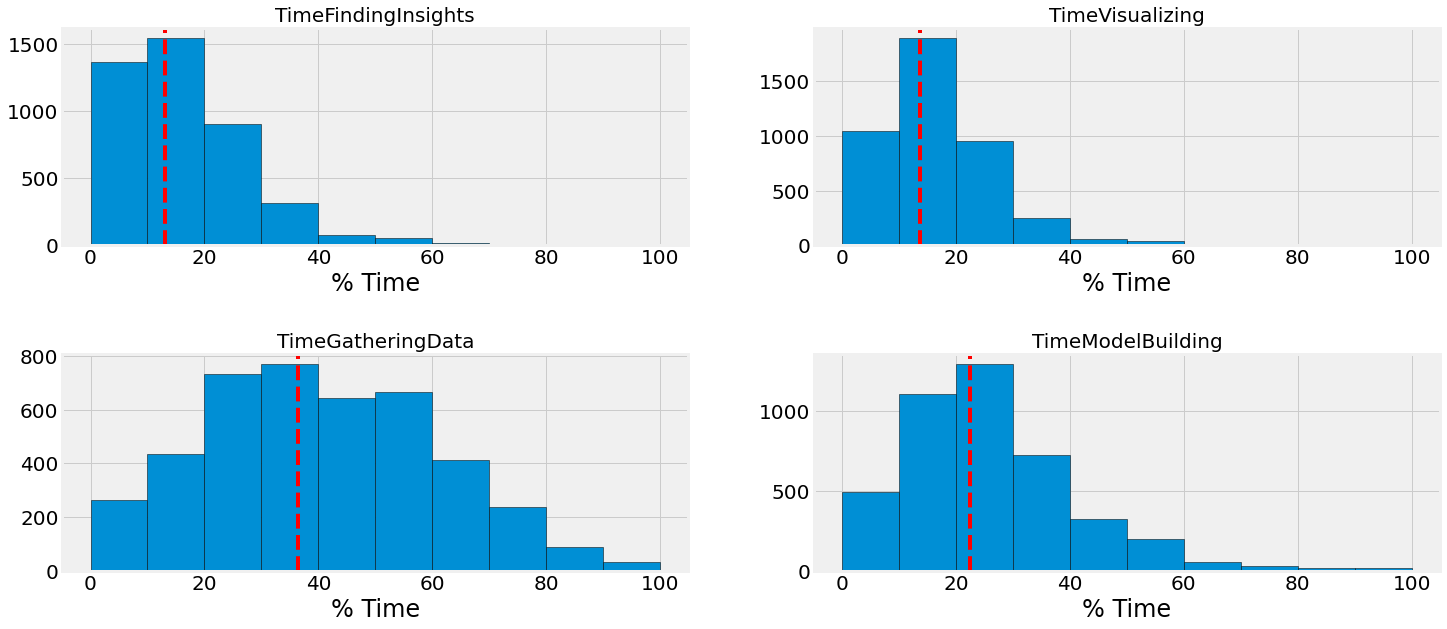

In [61]:
import itertools
plt.subplots(figsize=(22,10))
time_spent=['TimeFindingInsights','TimeVisualizing','TimeGatheringData','TimeModelBuilding']
length=len(time_spent)
for i,j in itertools.zip_longest(time_spent,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    scientist[i].hist(bins=10,edgecolor='black')
    plt.axvline(scientist[i].mean(),linestyle='dashed',color='r')
    plt.title(i,size=20)
    plt.xlabel('% Time')
plt.show()

리드 라인은 평균 라인입니다. 단계별로 수행해 보겠습니다.

TimeGatheringData: 그것은 의심할 여지 없이 가장 시간이 많이 걸리는 부분이다. 데이터를 얻는 것은 전체 프로세스에서 가장 힘든 작업이며, 그 다음으로는 데이터 클리닝(데이터를 사용할 수 없는 것으로 표시되지 않음)이 뒤따르는데, 이는 아직 시간이 많이 걸리는 프로세스입니다. 따라서 올바른 데이터를 수집하고 데이터를 스크래핑하는 것은 가장 많은 시간이 소요되는 프로세스입니다.

시간시각화: 가장 시간이 적게 드는 과정(아마도 가장 즐거운 과정 그리고 아마도 가장 즐거운 과정일 것이다.:p), 간단한 드래그 앤 드롭 기능으로 그래프와 대시보드를 작성하는 데 도움이 되는 Tableau, Klik, Tibco 등과 같은 Enterprise Tools를 사용하면 훨씬 더 줄어듭니다.

TimeFindingInsights: 데이터에서 사실과 패턴을 찾아내고, 이를 잘라 비즈니스 프로세스에 대한 통찰력을 찾는 작업이 수반되는 데이터를 시각화한 후 뒤따른다.TimeVisualizing에 비해 조금 더 많은 시간이 소요될 것으로 보입니다.

TimeModelBuilding: 그곳에서는 데이터 과학자들이 예측 모델을 만들고, 모델을 조정하는 등의 작업을 합니다. 이것은 TimeDataGathering 다음으로 시간이 많이 걸리는 공정입니다.

### Cloud Services

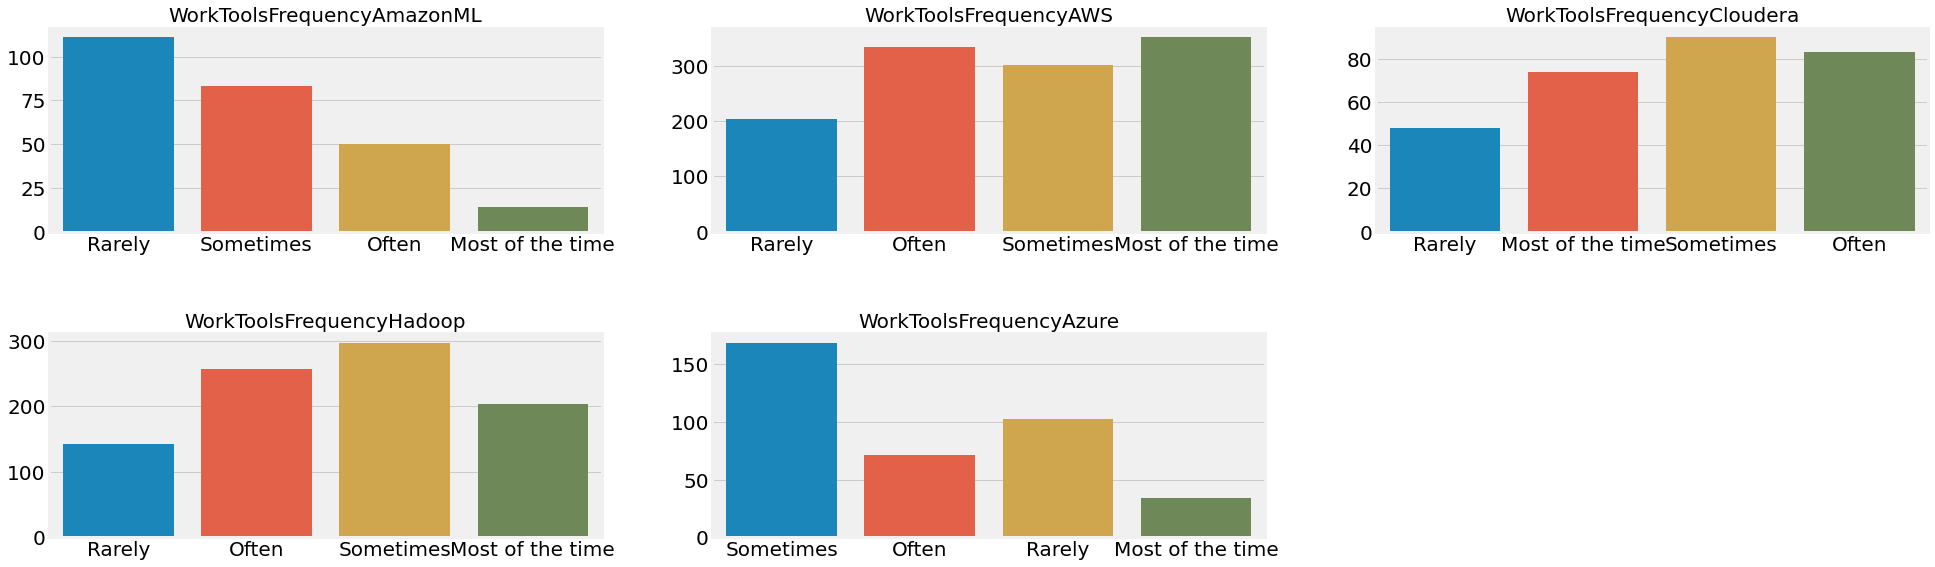

In [62]:
cloud=['WorkToolsFrequencyAmazonML','WorkToolsFrequencyAWS','WorkToolsFrequencyCloudera','WorkToolsFrequencyHadoop','WorkToolsFrequencyAzure']
plt.subplots(figsize=(30,15))
length=len(cloud)
for i,j in itertools.zip_longest(cloud,range(length)):
    plt.subplot((length/2+1),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=scientist)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

### Importance Of Visualisations

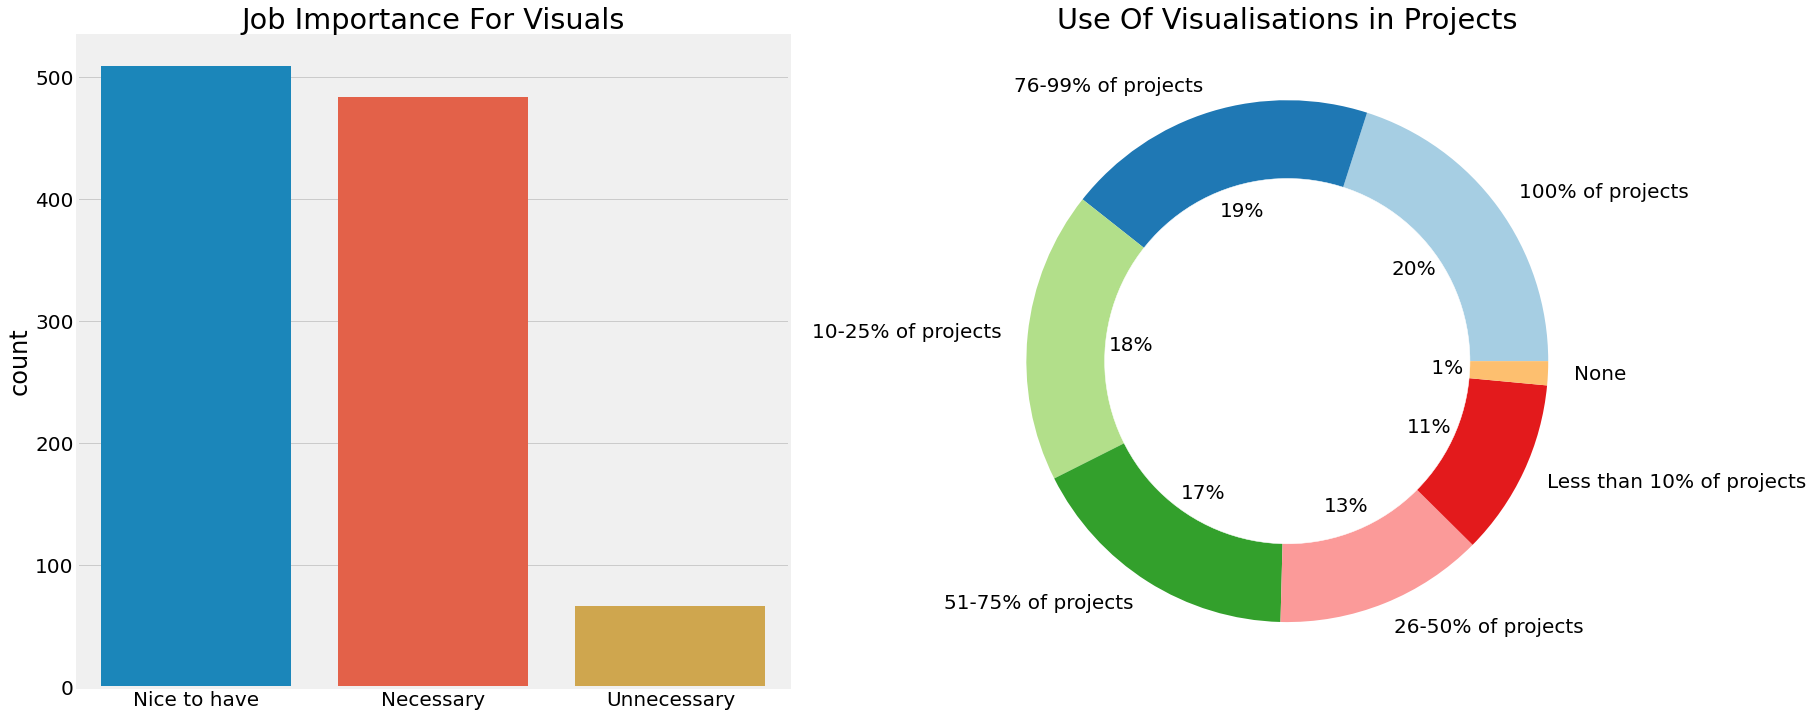

In [63]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(scientist['JobSkillImportanceVisualizations'],ax=ax[0])
ax[0].set_title('Job Importance For Visuals')
ax[0].set_xlabel('')
scientist['WorkDataVisualizations'].value_counts().plot.pie(autopct='%2.0f%%',colors=sns.color_palette('Paired',10),ax=ax[1])
ax[1].set_title('Use Of Visualisations in Projects')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

### BI Tools

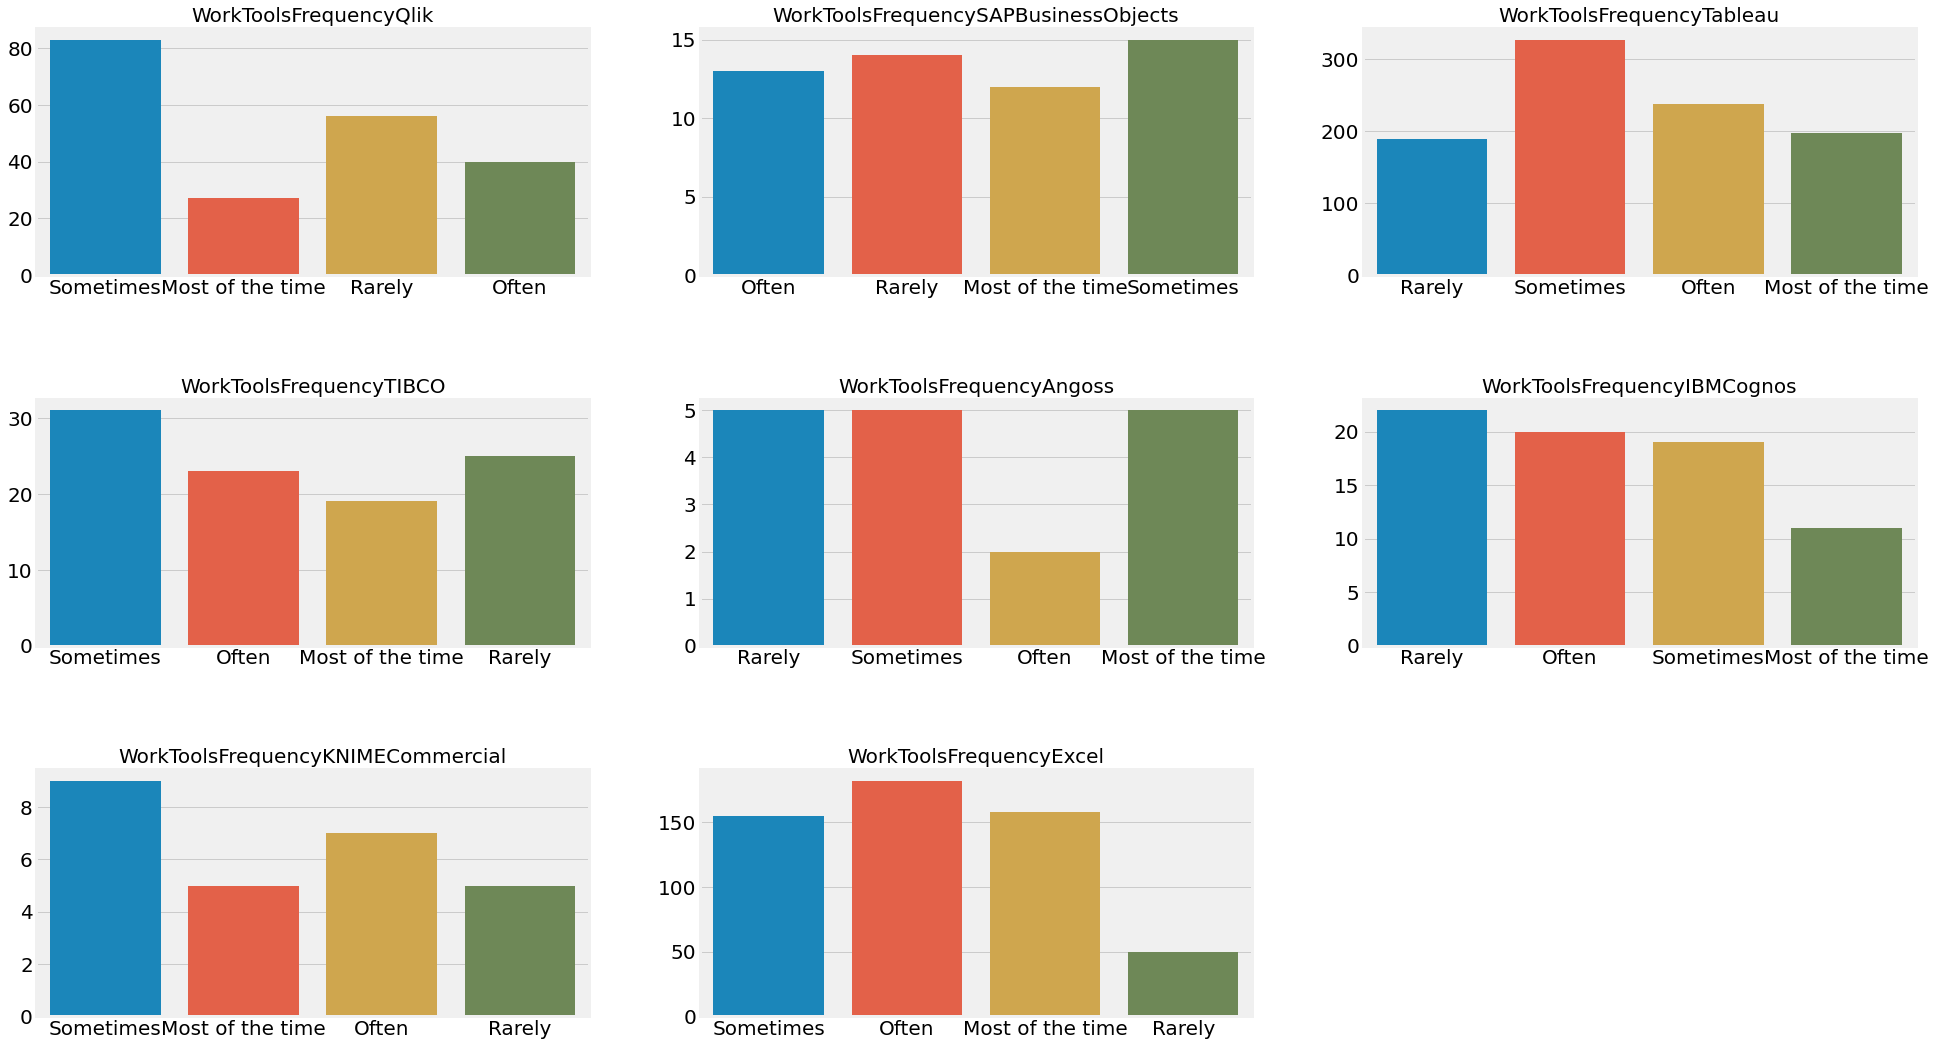

In [64]:
# 코드 저장
BI=['WorkToolsFrequencyQlik','WorkToolsFrequencySAPBusinessObjects','WorkToolsFrequencyTableau','WorkToolsFrequencyTIBCO','WorkToolsFrequencyAngoss','WorkToolsFrequencyIBMCognos','WorkToolsFrequencyKNIMECommercial','WorkToolsFrequencyExcel']
plt.subplots(figsize=(30,25))
length=len(BI)
for i, j in itertools.zip_longest(BI, range(length)):
  plt.subplot((length/2), 3, j+1)
  plt.subplots_adjust(wspace=0.2, hspace = 0.5)
  sns.countplot(i, data = scientist)
  plt.title(i, size = 20)
  plt.ylabel('')
  plt.xlabel('')
plt.show()

엑셀이 분석가들의 밥줄이라는 말을 어디선가 읽거나 들은 적이 있다. 엑셀이 데이터 사이언티스트들 사이에서 여전히 인기가 있기 때문에 이 점은 여전히 어느 정도 유효하다. 그러나 가장 자주 사용되는 BI 도구는 Tableau인 것으로 보입니다. 저는 개인적으로 Tableau를 사용하는데 이것은 꽤 사용자 친화적이고 드래그 앤 드롭이 가능하며 당신은 그래프를 준비했습니다.

## Knowledge Of Algorithms (Maths and Stats)

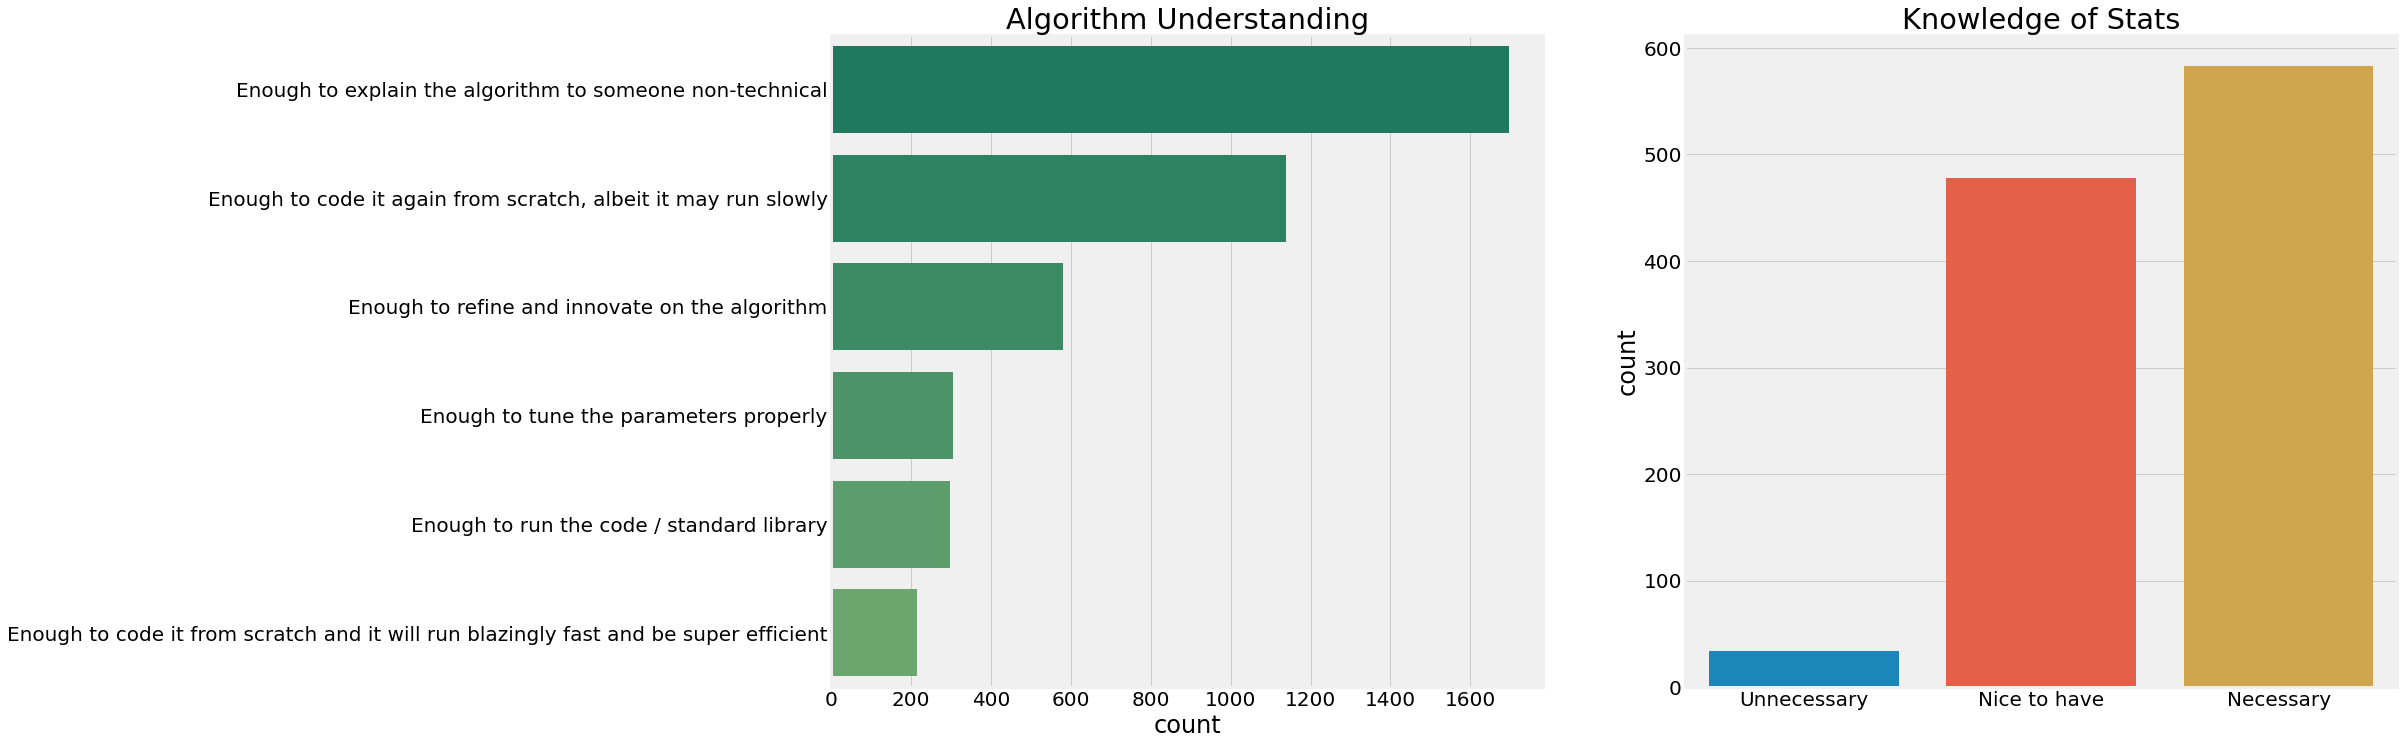

In [65]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(y=scientist['AlgorithmUnderstandingLevel'],order=scientist['AlgorithmUnderstandingLevel'].value_counts().index,ax=ax[0],palette=sns.color_palette('summer',15))
sns.countplot(scientist['JobSkillImportanceStats'],ax=ax[1])
ax[0].set_title('Algorithm Understanding')
ax[0].set_ylabel('')
ax[1].set_title('Knowledge of Stats')
ax[1].set_xlabel('')
plt.show()

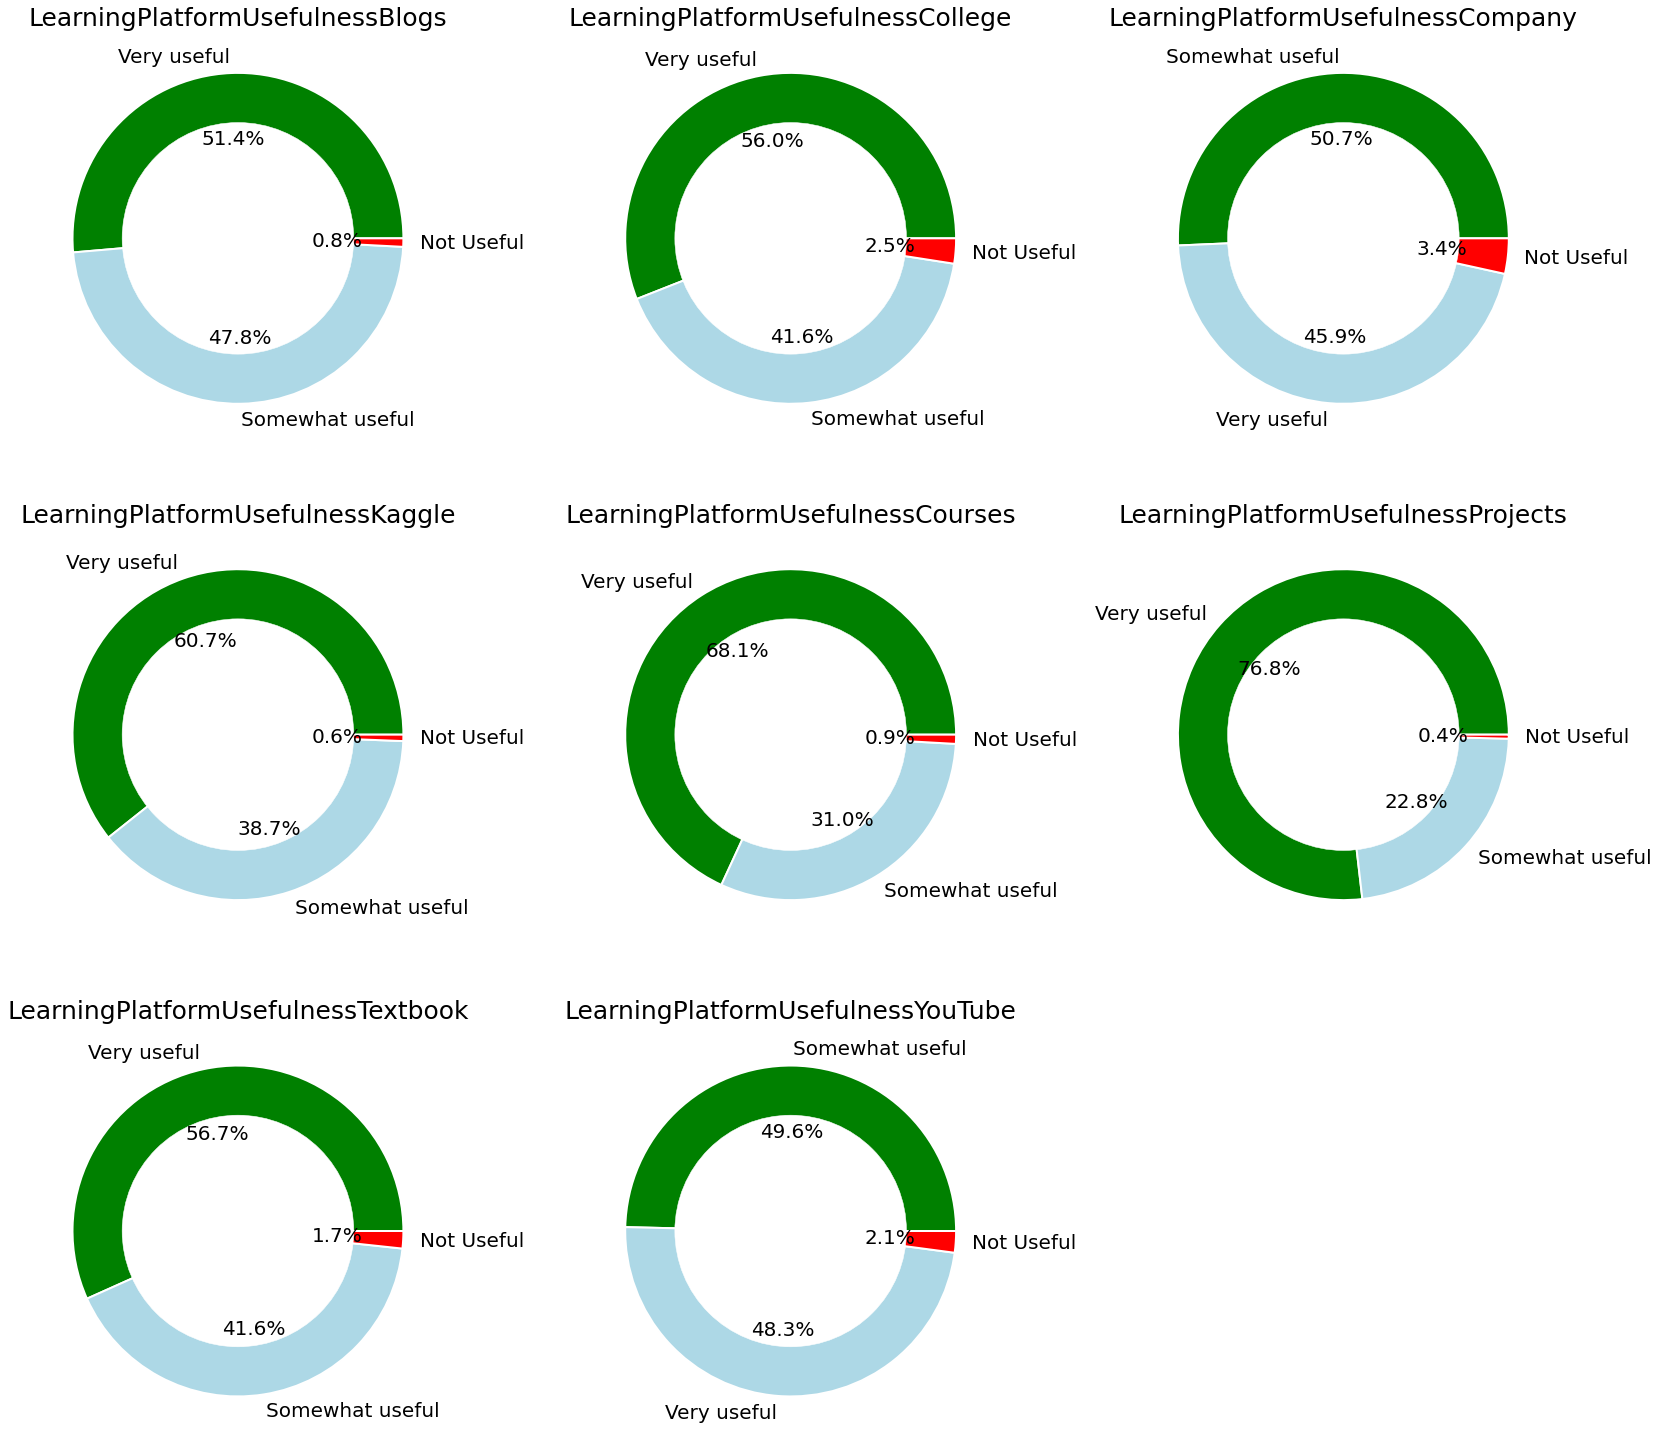

In [66]:
plt.subplots(figsize=(25,35))
useful=['LearningPlatformUsefulnessBlogs','LearningPlatformUsefulnessCollege','LearningPlatformUsefulnessCompany','LearningPlatformUsefulnessKaggle','LearningPlatformUsefulnessCourses','LearningPlatformUsefulnessProjects','LearningPlatformUsefulnessTextbook','LearningPlatformUsefulnessYouTube']
length=len(useful)
for i,j in itertools.zip_longest(useful,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    scientist[i].value_counts().plot.pie(autopct='%1.1f%%',colors=['g','lightblue','r'],wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
    plt.title(i,size=25)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

### What should the Resume have??

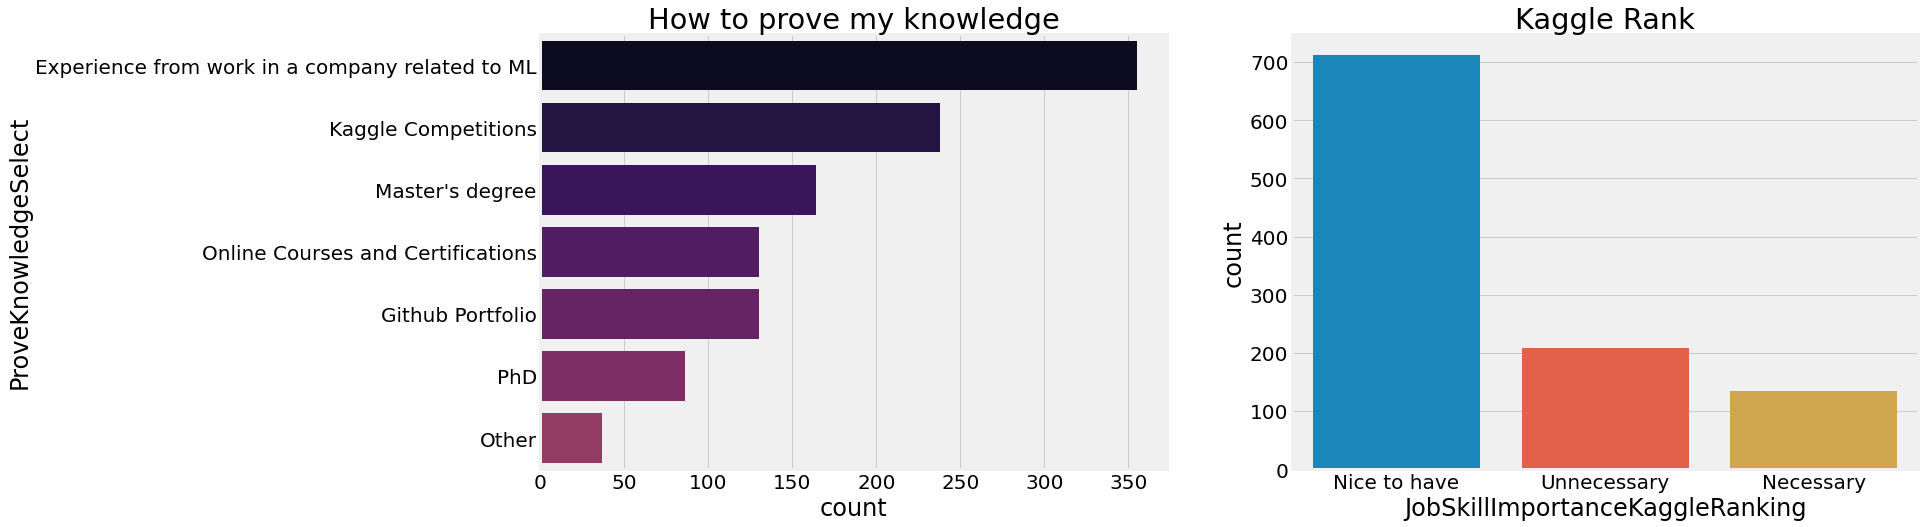

In [67]:
f,ax=plt.subplots(1,2,figsize=(22,8))
sns.countplot(y=scientist['ProveKnowledgeSelect'],order=scientist['ProveKnowledgeSelect'].value_counts().index,ax=ax[0],palette=sns.color_palette('inferno',15))
ax[0].set_title('How to prove my knowledge')
sns.countplot(scientist['JobSkillImportanceKaggleRanking'],ax=ax[1])
ax[1].set_title('Kaggle Rank')
plt.show()

ML 프로젝트와 Kaggle 대회에서의 업무 경험이 데이터 과학 지식을 반영하고 있는 것은 분명하다. 또한 카글 등급은 이력서에 좋은 점이 될 수 있습니다. 앞서 언급했듯이, 관련 업무 경험은 어떤 석박사 학위보다 더 높은 가치를 가질 수 있습니다. 위의 그래프에서 볼 수 있듯이 데이터 과학자는 학위보다 업무 경험을 선호하기 때문에 이 진술은 유효하다.

## How did they search for Jobs??

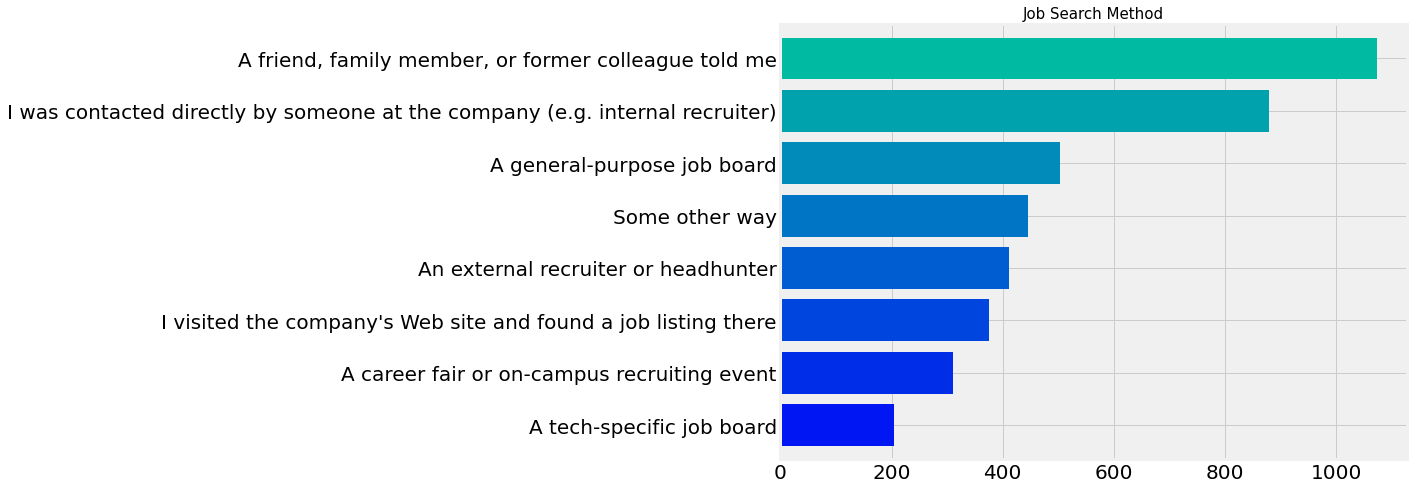

In [68]:
plt.subplots(figsize=(10,8))
scientist.groupby(['EmployerSearchMethod'])['Age'].count().sort_values(ascending=True).plot.barh(width=0.8,color=sns.color_palette('winter',10))
plt.title('Job Search Method',size=15)
plt.ylabel('')
plt.show()

## Checking the Free Responses

이 파일은 응답자가 답변한 자유 양식 응답을 포함합니다. 이것의 문제점은 자유로운 양식 응답이기 때문에 모든 사용자는 자신만의 방식으로 대답할 수 있다는 것입니다. 내 말은 우리는 같은 것에 대해 서로 다른 답을 갖게 될 거라는 거야. 내가 관찰한 예로는 판다가 판다, 판다, 판다로 쓰여진 도서관이 있으며, 이와 같은 여러 가지 다른 형태로 되어 있습니다. 따라서 nltk(Natural Language Toolkit)를 사용하여 이 파일을 분석해보겠습니다.

In [72]:
!pip install NLTK

In [73]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
free=pd.read_csv('/content/drive/MyDrive/Study/kaggle_study/8_1.Survey/freeformResponses.csv')
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...')

LookupError: ignored

### Most Frequently Used Libraries

In [74]:
library=free['WorkLibrariesFreeForm'].dropna().apply(nltk.word_tokenize)
lib=[]
for i in library:
    lib.extend(i)
lib=pd.Series(lib)
lib=([i for i in lib.str.lower() if i not in stop_words])
lib=pd.Series(lib)
lib=lib.value_counts().reset_index()
lib.loc[lib['index'].str.contains('Pandas|pandas|panda'),'index']='Pandas'
lib.loc[lib['index'].str.contains('Tensorflow|tensorflow|tf|tensor'),'index']='Tensorflow'
lib.loc[lib['index'].str.contains('Scikit|scikit|sklearn'),'index']='Sklearn'
lib=lib.groupby('index')[0].sum().sort_values(ascending=False).to_frame()
R_packages=['dplyr','tidyr','ggplot2','caret','randomforest','shiny','R markdown','ggmap','leaflet','ggvis','stringr','tidyverse','plotly']
Py_packages=['Pandas','Tensorflow','Sklearn','matplotlib','numpy','scipy','seaborn','keras','xgboost','nltk','plotly']
f,ax=plt.subplots(1,2,figsize=(18,10))
lib[lib.index.isin(Py_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[0],width=0.9,color=sns.color_palette('viridis',15))
ax[0].set_title('Most Frequently Used Py Libraries')
lib[lib.index.isin(R_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[1],width=0.9,color=sns.color_palette('viridis',15))
ax[1].set_title('Most Frequently Used R Libraries')
ax[1].set_ylabel('')
plt.show()

LookupError: ignored

Python:

1) Sklearn- For Machine Learning algorithms. This library has almost all the important machine learning algorithms used for industries.

2) Pandas, Matlotlib & Seaborn- Mostly used together for analytics and visualisation work.

3) TensorFlow and Keras- Used for Deep Learning.

4) Numpy and Scipy- Used for scientific computations.

5) nltk- Used for Natural Language Processing.



R:

1) dplyr- dplyr is the package for fast data manipulation.

2) ggplot2 and shiny- R's famous package for making beautiful graphics. Python visuals are nowhere near to the quality of visuals created using this library.

3) caret and randomforest- For Machine Learning purpose.

4) tidyr- Tools for changing the layout of your data sets.

5) stringr- Easy to learn tools for regular expressions and character strings.

Leaflet (folium in Python) and Plotly are common libraries in both languages, and are used to create interactive plots like geomaps, etc.

# Conclusions

노트북에서 수집한 몇 가지 간단한 통찰력은 다음과 같습니다.

1) 응답자 대다수는 미국, 그 다음은 인도이다. 데이터 과학자 수도 미국이 가장 많았고 인도가 그 뒤를 이었다. 또한 급여의 중위수는 미국에서 가장 높습니다.

2) 20~35세 연령층이 대다수이며, 이는 데이터 과학이 젊은 층에서 상당히 유명함을 보여준다.

3) 응답자는 컴퓨터 과학 전공뿐만 아니라 통계학, 보건학 등과 같은 전공자도 데이터 과학이 학제간 영역임을 알 수 있습니다.

4) 응답자의 대다수는 완전고용 상태에 있다.

5) Kaggle, 온라인 과정(Coursera, eDx, 등), 프로젝트 및 블로그(KDNuggets, AnalyticsVidya 등)는 데이터 사이언스 학습을 위한 상위 리소스/플랫폼입니다.

6) Kaggle은 데이터 획득 점유율 1위, Github는 코드 공유 점유율 1위입니다.

7) 데이터 과학자의 직무 만족도 수준이 가장 높고 (운영 연구 분석가 다음으로) 중간 급여가 두 번째로 높습니다. 반대로 프로그래머는 직업 만족도가 가장 낮고 중간 정도의 연봉도 가장 낮습니다.

8) 데이터 과학자 역시 이전 직종보다 약 6-20% 상승했습니다.

신생 데이터 과학자를 위한 팁
1) 데이터 과학자가 가장 많이 사용하는 언어인 Python,R 및 SQL을 학습합니다. Python과 R은 분석 및 예측 모델링에 도움이 되는 반면 SQL은 데이터베이스 쿼리에 가장 적합합니다.

2) 가장 일반적으로 사용되는 기계 학습 기법/알고리즘이므로 로지스틱 회귀 분석, 의사 결정 트리, 서포트 벡터 머신 등과 같은 기계 학습 기술을 학습합니다.

3) 딥러닝과 신경망은 미래에 가장 많이 찾는 기술이 될 것이므로 이에 대한 좋은 지식이 많은 도움이 될 것이다.

4) 데이터 과학자의 워크플로우에서 데이터 수집 및 데이터 정리를 위한 기술을 개발합니다.

5) 데이터 과학 프로젝트에서 시각화는 매우 중요하며, 거의 모든 프로젝트는 데이터를 더 잘 이해하기 위해 시각화를 요구한다. 따라서 데이터 과학자가 데이터 시각화를 필수 또는 보유하는 데 좋다고 생각하는 만큼 데이터 시각화를 배워야 합니다.

6) 데이터 사이언스는 수학과 통계가 매우 중요하므로 알고리즘의 작동 방식을 실제로 이해하기 위해서는 수학과 통계가 매우 중요합니다.

7) 데이터 사이언티스트에 따르면 데이터 사이언스를 학습하는 가장 좋은 방법은 프로젝트라고 합니다.따라서 프로젝트를 진행하면 데이터 과학을 더 잘 배울 수 있습니다.

8) 회사에서의 ML 프로젝트 및 Kaggle Competition에 대한 경험은 데이터 과학에 대한 실무 지식을 보여줄 수 있는 가장 좋은 방법입니다. 회사에서 ML 프로젝트를 진행하면 실제 데이터셋으로 작업하는 경험을 얻을 수 있어 지식을 높일 수 있다. Kaggle 대회는 전 세계의 데이터 사이언티스트와 경쟁할 수 있는 훌륭한 매체이기도 합니다. 또한 Kaggle Rank는 이력서에서 좋은 USP가 될 수 있습니다.